# 1. Introduction
The objective is to develop a linear regression model to predict the number of shares an online news article will receive. The challenge lies in effectively handling the high-dimensional data, consisting of 39,644 observations and 61 attributes, to enhance the model's predictive performance

* **Explanatory Data Analysis**: Initial data examination for understanding, cleaning, and preparing the dataset.
* **Correlation Analysis**: Assess linear relationships between features and the target variable.
* **Feature Selection/Dimensionality Reduction**: Employ various techniques to reduce the number of features, focusing on retaining those most impactful for our model.
* **Model Building and Evaluation**: Construct and evaluate a linear regression model using the selected features.
* **Conclusions**: Summarize findings, model performance, and insights.

In [1]:
# Libaries import
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from copy import copy

## Open Book - Ideas to consider

* Investigate the impact of the number of images and videos on an article's popularity.

* Examine if there's a correlation between the length of an article's content and/or its title with its popularity.

* Determine if there's a definitive link between the average word length in an article's content and its popularity.

* Develop a rating system for article popularity, such as Excellent, Good, Okay, Poor, Very Poor.

* Analyze how different channels rank in terms of share-based popularity.

* Identify which data channel is most popular and what specific aspects of that channel contribute to its popularity. Assess if similar features are seen in other channels.

* Explore the impact of keywords classified as Worst, Best, and Average on popularity.

* Investigate if there's a correlation between the minimum, maximum, or average number of shares an article receives and the number of shares in its referenced articles.

* Determine when during the weekend articles are shared the most, and if this indicates higher readership on those days.

* Explore the influence of LDA (Latent Dirichlet Allocation) analysis on article popularity.

* Assess if articles with higher text sentiment scores are more popular.

* Examine the relationship between text sentiment and the day of the week an article is published. Are certain days associated with more sentiment?

* Investigate the impact of positive versus negative wording in an article's sentiment on its popularity. Determine the ratio of positive to negative worded articles in the dataset, and whether this can be used as a basis for assessing popularity.

* Consider the effect of subjectivity in the article's title and text on its popularity.

## Reading the data

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/minjaelee0522/DAV6150/master/M4%20Feature%20Selection%20%26%20Dimension%20Reduction/M4_Data.csv")
data.head(n=4)
origianl_data = copy(data)
data.columns

Index(['url', ' timedelta', ' n_tokens_title', ' n_tokens_content',
       ' n_unique_tokens', ' n_non_stop_words', ' n_non_stop_unique_tokens',
       ' num_hrefs', ' num_self_hrefs', ' num_imgs', ' num_videos',
       ' average_token_length', ' num_keywords', ' data_channel_is_lifestyle',
       ' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_socmed', ' data_channel_is_tech',
       ' data_channel_is_world', ' kw_min_min', ' kw_max_min', ' kw_avg_min',
       ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg',
       ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares',
       ' self_reference_max_shares', ' self_reference_avg_sharess',
       ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
       ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
       ' weekday_is_sunday', ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02',
       ' LDA_03', ' LDA_04', ' global_subjectivity',
       ' global_sent

# 1. EDA

In [3]:
# Here we drop the two non-preditive (url and timedelta) attributes. They won't contribute anything
data.drop(labels=['url', ' timedelta'], axis = 1, inplace=True)
data.head(n=4)

n_tokens_title   n_tokens_content   n_unique_tokens   n_non_stop_words  \
0             12.0              219.0          0.663594                1.0   
1              9.0              255.0          0.604743                1.0   
2              9.0              211.0          0.575130                1.0   
3              9.0              531.0          0.503788                1.0   

    n_non_stop_unique_tokens   num_hrefs   num_self_hrefs   num_imgs  \
0                   0.815385         4.0              2.0        1.0   
1                   0.791946         3.0              1.0        1.0   
2                   0.663866         3.0              1.0        1.0   
3                   0.665635         9.0              0.0        1.0   

    num_videos   average_token_length  ...   min_positive_polarity  \
0          0.0               4.680365  ...                0.100000   
1          0.0               4.913725  ...                0.033333   
2          0.0               4.393365  ...                0.100000   
3          0.0               4.404896  ...                0.136364   

    max_positive_polarity   avg_negative_polarity   min_negative_polarity  \
0                     0.7               -0.350000                  -0.600   
1                     0.7               -0.118750                  -0.125   
2                     1.0               -0.466667                  -0.800   
3                     0.8               -0.369697                  -0.600   

    max_negative_polarity   title_subjectivity   title_sentiment_polarity  \
0               -0.200000                  0.5                    -0.1875   
1               -0.100000                  0.0                     0.0000   
2               -0.133333                  0.0                     0.0000   
3               -0.166667                  0.0                     0.0000   

    abs_title_subjectivity   abs_title_sentiment_polarity   shares  
0                      0.0                         0.1875      593  
1                      0.5                         0.0000      711  
2                      0.5                         0.0000     1500  
3                      0.5                         0.0000     1200  

[4 rows x 59 columns]

In [4]:
# describing the data
data.describe()
# from the data, there will be need to normailze the data if their will be need for condersing any machine learning model.

n_tokens_title   n_tokens_content   n_unique_tokens  \
count     39644.000000       39644.000000      39644.000000   
mean         10.398749         546.514731          0.548216   
std           2.114037         471.107508          3.520708   
min           2.000000           0.000000          0.000000   
25%           9.000000         246.000000          0.470870   
50%          10.000000         409.000000          0.539226   
75%          12.000000         716.000000          0.608696   
max          23.000000        8474.000000        701.000000   

        n_non_stop_words   n_non_stop_unique_tokens     num_hrefs  \
count       39644.000000               39644.000000  39644.000000   
mean            0.996469                   0.689175     10.883690   
std             5.231231                   3.264816     11.332017   
min             0.000000                   0.000000      0.000000   
25%             1.000000                   0.625739      4.000000   
50%             1.000000                   0.690476      8.000000   
75%             1.000000                   0.754630     14.000000   
max          1042.000000                 650.000000    304.000000   

        num_self_hrefs      num_imgs    num_videos   average_token_length  \
count     39644.000000  39644.000000  39644.000000           39644.000000   
mean          3.293638      4.544143      1.249874               4.548239   
std           3.855141      8.309434      4.107855               0.844406   
min           0.000000      0.000000      0.000000               0.000000   
25%           1.000000      1.000000      0.000000               4.478404   
50%           3.000000      1.000000      0.000000               4.664082   
75%           4.000000      4.000000      1.000000               4.854839   
max         116.000000    128.000000     91.000000               8.041534   

       ...   min_positive_polarity   max_positive_polarity  \
count  ...            39644.000000            39644.000000   
mean   ...                0.095446                0.756728   
std    ...                0.071315                0.247786   
min    ...                0.000000                0.000000   
25%    ...                0.050000                0.600000   
50%    ...                0.100000                0.800000   
75%    ...                0.100000                1.000000   
max    ...                1.000000                1.000000   

        avg_negative_polarity   min_negative_polarity   max_negative_polarity  \
count            39644.000000            39644.000000            39644.000000   
mean                -0.259524               -0.521944               -0.107500   
std                  0.127726                0.290290                0.095373   
min                 -1.000000               -1.000000               -1.000000   
25%                 -0.328383               -0.700000               -0.125000   
50%                 -0.253333               -0.500000               -0.100000   
75%                 -0.186905               -0.300000               -0.050000   
max                  0.000000                0.000000                0.000000   

        title_subjectivity   title_sentiment_polarity  \
count         39644.000000               39644.000000   
mean              0.282353                   0.071425   
std               0.324247                   0.265450   
min               0.000000                  -1.000000   
25%               0.000000                   0.000000   
50%               0.150000                   0.000000   
75%               0.500000                   0.150000   
max               1.000000                   1.000000   

        abs_title_subjectivity   abs_title_sentiment_polarity         shares  
count             39644.000000                   39644.000000   39644.000000  
mean                  0.341843                       0.156064    3395.380184  
std                   0.188791                       0.226294   11626.950749  
min  

In [5]:
# creating a grading criteria for the shares
share_data = data[' shares']
data[' shares'].describe()

count     39644.000000
mean       3395.380184
std       11626.950749
min           1.000000
25%         946.000000
50%        1400.000000
75%        2800.000000
max      843300.000000
Name:  shares, dtype: float64

## Grading the Shares

* Exceptional = Top 95%
* Excellent = Top 90%
* Very Good = Top 80%
* Good = Top 60%
* Average = Top 50%
* Poor = Top 35%
* Very Poor = Rest


In [6]:
# create label grades for the classes
share_label = list()
for share in share_data:
    if share <= 645:
        share_label.append('Very Poor')
    elif share > 645 and share <= 861:
        share_label.append('Poor')
    elif share > 861 and share <= 1400:
        share_label.append('Average')
    elif share > 1400 and share <= 31300:
        share_label.append('Good')
    elif share > 31300 and share <= 53700:
        share_label.append('Very Good')
    elif share > 53700 and share <= 77200:
        share_label.append('Excellent')
    else:
        share_label.append('Exceptional')

# Update this class label into the dataframe
data = pd.concat([data, pd.DataFrame(share_label, columns=['popularity'])], axis=1)
data.head(4)


n_tokens_title   n_tokens_content   n_unique_tokens   n_non_stop_words  \
0             12.0              219.0          0.663594                1.0   
1              9.0              255.0          0.604743                1.0   
2              9.0              211.0          0.575130                1.0   
3              9.0              531.0          0.503788                1.0   

    n_non_stop_unique_tokens   num_hrefs   num_self_hrefs   num_imgs  \
0                   0.815385         4.0              2.0        1.0   
1                   0.791946         3.0              1.0        1.0   
2                   0.663866         3.0              1.0        1.0   
3                   0.665635         9.0              0.0        1.0   

    num_videos   average_token_length  ...   max_positive_polarity  \
0          0.0               4.680365  ...                     0.7   
1          0.0               4.913725  ...                     0.7   
2          0.0               4.393365  ...                     1.0   
3          0.0               4.404896  ...                     0.8   

    avg_negative_polarity   min_negative_polarity   max_negative_polarity  \
0               -0.350000                  -0.600               -0.200000   
1               -0.118750                  -0.125               -0.100000   
2               -0.466667                  -0.800               -0.133333   
3               -0.369697                  -0.600               -0.166667   

    title_subjectivity   title_sentiment_polarity   abs_title_subjectivity  \
0                  0.5                    -0.1875                      0.0   
1                  0.0                     0.0000                      0.5   
2                  0.0                     0.0000                      0.5   
3                  0.0                     0.0000                      0.5   

    abs_title_sentiment_polarity   shares  popularity  
0                         0.1875      593   Very Poor  
1                         0.0000      711        Poor  
2                         0.0000     1500        Good  
3                         0.0000     1200     Average  

[4 rows x 60 columns]

In [7]:
# Merging the weekdays columns channels as one single column
publishdayMerge=data[[' weekday_is_monday',' weekday_is_tuesday',' weekday_is_wednesday', 
                      ' weekday_is_thursday', ' weekday_is_friday',' weekday_is_saturday' ,' weekday_is_sunday' ]]
temp_arr=[]
for r in list(range(publishdayMerge.shape[0])):
    for c in list(range(publishdayMerge.shape[1])):
        if ((c==0) and (publishdayMerge.iloc[r,c])==1):
            temp_arr.append('Monday')
        elif ((c==1) and (publishdayMerge.iloc[r,c])==1):
            temp_arr.append('Tueday')
        elif ((c==2) and (publishdayMerge.iloc[r,c])==1):
            temp_arr.append('Wednesday')
        elif ((c==3) and (publishdayMerge.iloc[r,c])==1):
            temp_arr.append('Thursday')
        elif ((c==4) and (publishdayMerge.iloc[r,c])==1):
            temp_arr.append('Friday')
        elif ((c==5) and (publishdayMerge.iloc[r,c])==1):
            temp_arr.append('Saturday') 
        elif ((c==6) and (publishdayMerge.iloc[r,c])==1):
            temp_arr.append('Sunday')
            
# Merging the data channels as one single column
DataChannelMerge=data[[' data_channel_is_lifestyle',' data_channel_is_entertainment' ,' data_channel_is_bus',
                        ' data_channel_is_socmed' ,' data_channel_is_tech',' data_channel_is_world' ]]
#logic to merge data channel
DataChannel_arr=[]
for r in list(range(DataChannelMerge.shape[0])):
    if (((DataChannelMerge.iloc[r,0])==0) and ((DataChannelMerge.iloc[r,1])==0) and ((DataChannelMerge.iloc[r,2])==0) and ((DataChannelMerge.iloc[r,3])==0) and ((DataChannelMerge.iloc[r,4])==0) and ((DataChannelMerge.iloc[r,5])==0)):
        DataChannel_arr.append('Others')
    for c in list(range(DataChannelMerge.shape[1])):
        if ((c==0) and (DataChannelMerge.iloc[r,c])==1):
            DataChannel_arr.append('Lifestyle')
        elif ((c==1) and (DataChannelMerge.iloc[r,c])==1):
            DataChannel_arr.append('Entertainment')
        elif ((c==2) and (DataChannelMerge.iloc[r,c])==1):
            DataChannel_arr.append('Business')
        elif ((c==3) and (DataChannelMerge.iloc[r,c])==1):
            DataChannel_arr.append('Social Media')
        elif ((c==4) and (DataChannelMerge.iloc[r,c])==1):
            DataChannel_arr.append('Tech')
        elif ((c==5) and (DataChannelMerge.iloc[r,c])==1):
            DataChannel_arr.append('World')

In [8]:
# merge the the new data into the dataframe
data.insert(loc=11, column='weekdays', value=temp_arr)
data.insert(loc=12, column='data_channel', value=DataChannel_arr)

# Now I drop the old data
data.drop(labels=[' data_channel_is_lifestyle',' data_channel_is_entertainment' ,' data_channel_is_bus',
                        ' data_channel_is_socmed' ,' data_channel_is_tech',' data_channel_is_world', 
                 ' weekday_is_monday',' weekday_is_tuesday',' weekday_is_wednesday', 
                      ' weekday_is_thursday', ' weekday_is_friday',' weekday_is_saturday' ,' weekday_is_sunday'], axis = 1, inplace=True)
print(data.shape)
data.head(n=4)

(39644, 49)


n_tokens_title   n_tokens_content   n_unique_tokens   n_non_stop_words  \
0             12.0              219.0          0.663594                1.0   
1              9.0              255.0          0.604743                1.0   
2              9.0              211.0          0.575130                1.0   
3              9.0              531.0          0.503788                1.0   

    n_non_stop_unique_tokens   num_hrefs   num_self_hrefs   num_imgs  \
0                   0.815385         4.0              2.0        1.0   
1                   0.791946         3.0              1.0        1.0   
2                   0.663866         3.0              1.0        1.0   
3                   0.665635         9.0              0.0        1.0   

    num_videos   average_token_length  ...   max_positive_polarity  \
0          0.0               4.680365  ...                     0.7   
1          0.0               4.913725  ...                     0.7   
2          0.0               4.393365  ...                     1.0   
3          0.0               4.404896  ...                     0.8   

   avg_negative_polarity  min_negative_polarity   max_negative_polarity  \
0              -0.350000                 -0.600               -0.200000   
1              -0.118750                 -0.125               -0.100000   
2              -0.466667                 -0.800               -0.133333   
3              -0.369697                 -0.600               -0.166667   

    title_subjectivity   title_sentiment_polarity   abs_title_subjectivity  \
0                  0.5                    -0.1875                      0.0   
1                  0.0                     0.0000                      0.5   
2                  0.0                     0.0000                      0.5   
3                  0.0                     0.0000                      0.5   

    abs_title_sentiment_polarity   shares  popularity  
0                         0.1875      593   Very Poor  
1                         0.0000      711        Poor  
2                         0.0000     1500        Good  
3                         0.0000     1200     Average  

[4 rows x 49 columns]

In [9]:
data.columns

Index([' n_tokens_title', ' n_tokens_content', ' n_unique_tokens',
       ' n_non_stop_words', ' n_non_stop_unique_tokens', ' num_hrefs',
       ' num_self_hrefs', ' num_imgs', ' num_videos', ' average_token_length',
       ' num_keywords', 'weekdays', 'data_channel', ' kw_min_min',
       ' kw_max_min', ' kw_avg_min', ' kw_min_max', ' kw_max_max',
       ' kw_avg_max', ' kw_min_avg', ' kw_max_avg', ' kw_avg_avg',
       ' self_reference_min_shares', ' self_reference_max_shares',
       ' self_reference_avg_sharess', ' is_weekend', ' LDA_00', ' LDA_01',
       ' LDA_02', ' LDA_03', ' LDA_04', ' global_subjectivity',
       ' global_sentiment_polarity', ' global_rate_positive_words',
       ' global_rate_negative_words', ' rate_positive_words',
       ' rate_negative_words', ' avg_positive_polarity',
       ' min_positive_polarity', ' max_positive_polarity',
       ' avg_negative_polarity', ' min_negative_polarity',
       ' max_negative_polarity', ' title_subjectivity',
       ' title_

### Here we check the class balance


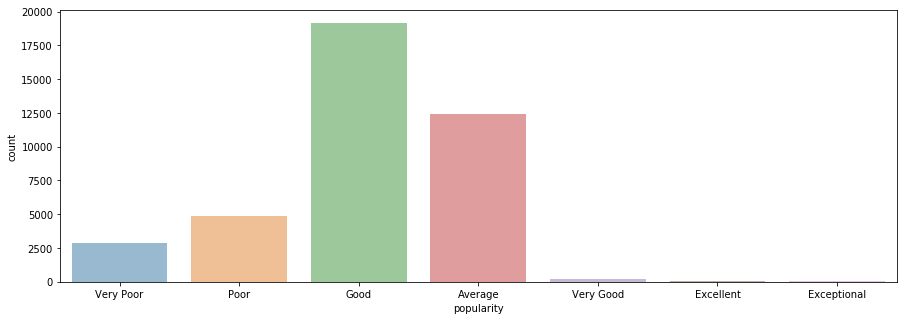

In [10]:
# Evaluating features (sensors) contribution towards the label
fig = plt.figure(figsize=(15,5))
ax = sns.countplot(x='popularity',data=data,alpha=0.5)


In [11]:
# Fetch the counts for each class
class_counts = data.groupby('popularity').size().reset_index()
class_counts.columns = ['Popularity','No of articles']
class_counts


Popularity  No of articles
0      Average           12381
1    Excellent              80
2  Exceptional              95
3         Good           19156
4         Poor            4852
5    Very Good             231
6    Very Poor            2849

## Data Visualization 
Evaluating our hypothesis

In [12]:
# Visualizaing the "low" expectation hypothesis
# n_non_stop_words
print(data[' n_non_stop_words'].describe())
# Comment - Visualizing the n_non_stop_words data field shows that the present of a record with 1042 value, 
# futher observation of that data shows that it belongs to entertainment which is not actually. It belongs to world news or others.
# this particluar also contains 0 on a lot of attributes. This record is classifed as a noise and will be remove.
data = data[data[' n_non_stop_words'] != 1042]
# Here, we will go ahead and drop the field of ' n_non_stop_words'
data.drop(labels=[' n_non_stop_words'], axis = 1, inplace=True)


count    39644.000000
mean         0.996469
std          5.231231
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max       1042.000000
Name:  n_non_stop_words, dtype: float64


### Noise Removal
 - We noticed some irregularities in the dataset arising from various attributes.

In [13]:
# remove noise from n_tokens_content. those equals to 0
data  = data[data[' n_tokens_content'] != 0]
print ("After noise removal - ",data.shape)

After noise removal -  (38462, 48)


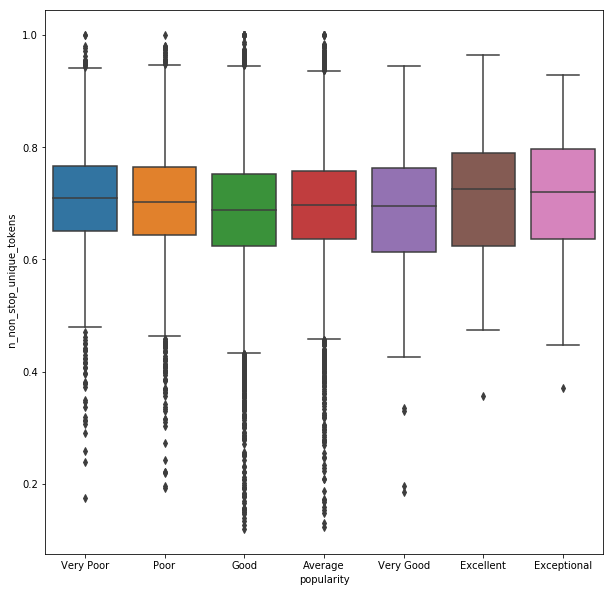

In [14]:
# n_non_stop_unique_tokens
data[' n_non_stop_unique_tokens'].describe()
# a lot of unique words, it is better to use a different plot from bar plots
# line plot
temp_data = data[data[' shares'] <= 100000]
fig, axes = plt.subplots(figsize=(10,10))
# box plot
sns.boxplot(x='popularity', y=' n_non_stop_unique_tokens', data=data, ax=axes)
# box plot of the dataset shows majority (75%) of the data inrespective of their shares is in the range of 0.6 - 0.8.
# So does it offers any uniques? No, it doesn't.

In [15]:
#kw_min_min and related kw_ terms
data[' kw_min_min'].describe()
temp_data = data[data[' shares'] <= 100000]
# running a pair plot for the kw__terms
kw_cols = [' kw_min_min', ' kw_max_min', ' kw_avg_min', ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg', 
            ' kw_max_avg', ' kw_avg_avg', ' shares']
# run a pairplot
#sns.pairplot(temp_data, vars=kw_cols, hue='popularity', diag_kind='kde')


'\nThere is a linear relationship between rate_positive_words and rate_negative_words (it is expected)\nrate_positive_words = No special relationship or observable trait was observed for this variable. Although most of articles tends \nto be on falls towards the 0.3 - 1\nrate_negative_words = No special relationship or observable trait was observed for this variable. Although most of articles tends \nto be on falls towards the 0.8 - 0 = Note the articles with popularity less than "average" have the lowest negative score rate.\nglobal_rate_positive_words - There is a slight relationship with shares. - Medium\nglobal_rate_negative_words - There is a slight relationship with shares. - Medium\n\n'

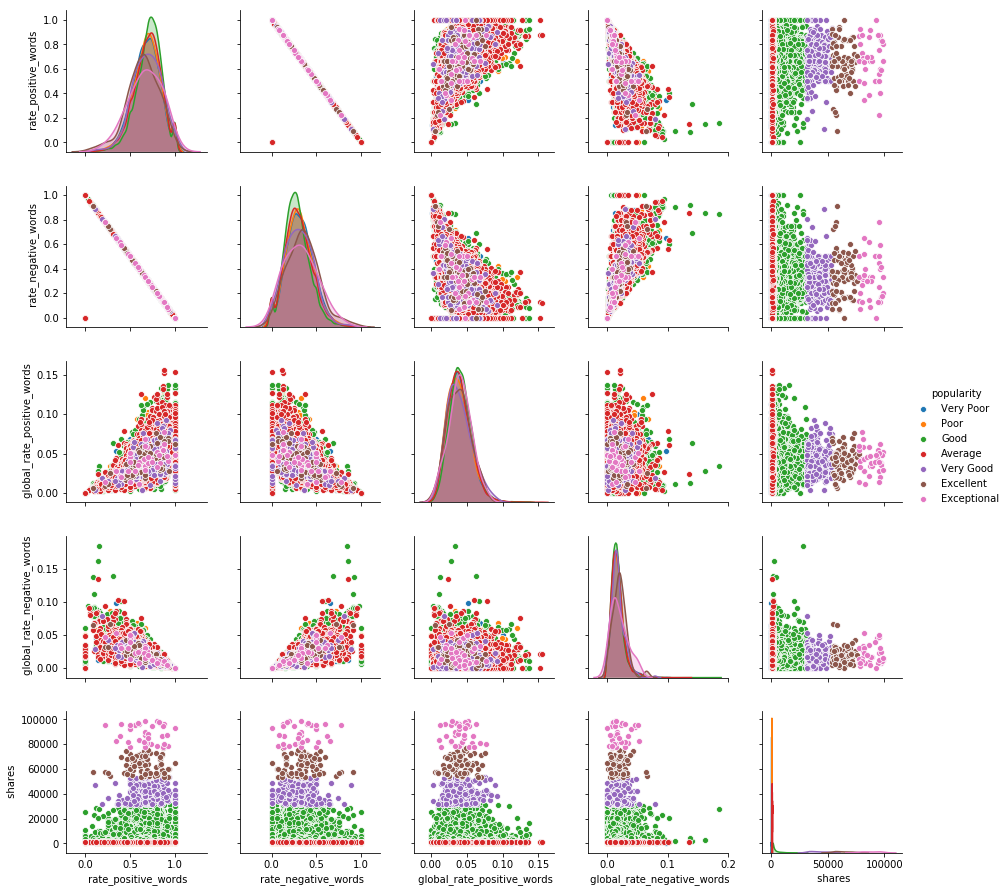

In [16]:
#Finding relationship between 'rate_positive_words', 'rate_negative_words', 'global_rate_positive_words', 'global_rate_negative_words', and 'shares'
temp_data = data[data[' shares'] <= 100000]
# running a pair plot for the these terms
kw_cols = [' rate_positive_words', ' rate_negative_words', ' global_rate_positive_words', ' global_rate_negative_words', ' shares']
# run a pairplot
sns.pairplot(temp_data, vars=kw_cols, hue='popularity', diag_kind='kde')

'''
There is a linear relationship between rate_positive_words and rate_negative_words (it is expected)
rate_positive_words = No special relationship or observable trait was observed for this variable. Although most of articles tends 
to be on falls towards the 0.3 - 1
rate_negative_words = No special relationship or observable trait was observed for this variable. Although most of articles tends 
to be on falls towards the 0.8 - 0 = Note the articles with popularity less than "average" have the lowest negative score rate.
global_rate_positive_words - There is a slight relationship with shares. - Medium
global_rate_negative_words - There is a slight relationship with shares. - Medium

'''

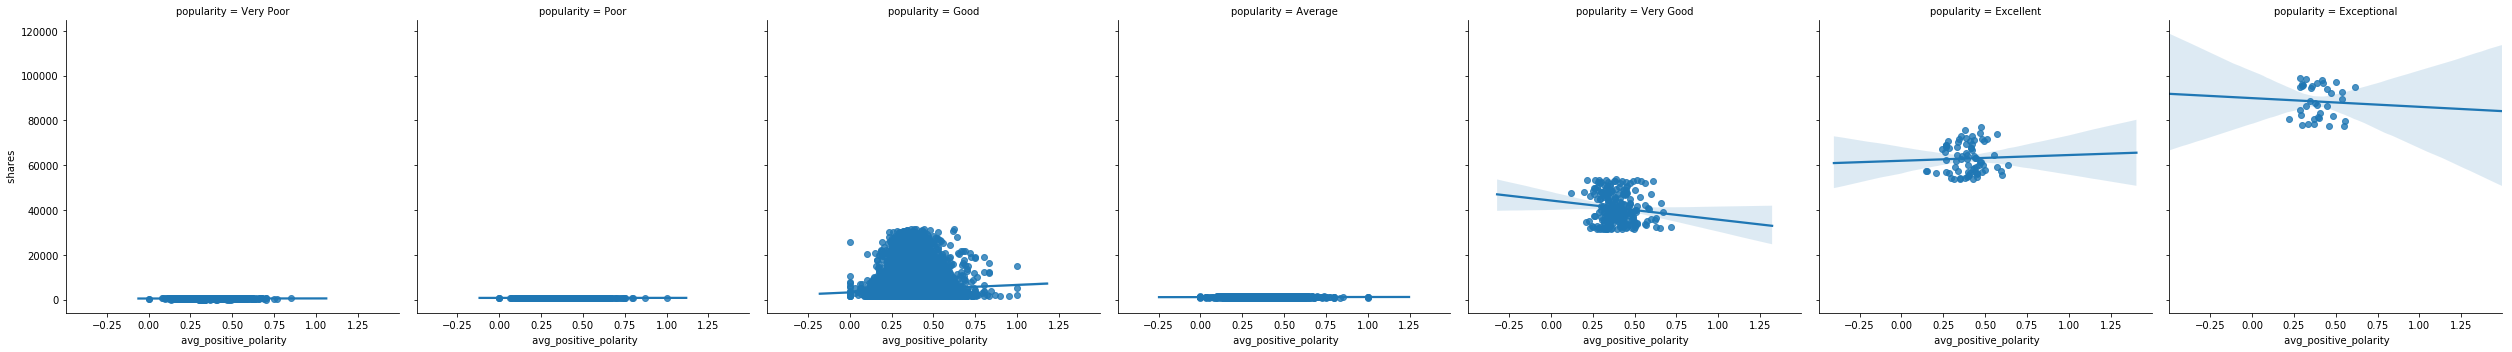

In [17]:
# attempt polartiy
temp_data = data[data[' shares'] <= 100000]
sns.lmplot(x=' avg_positive_polarity', y=' shares', col='popularity', data=temp_data)

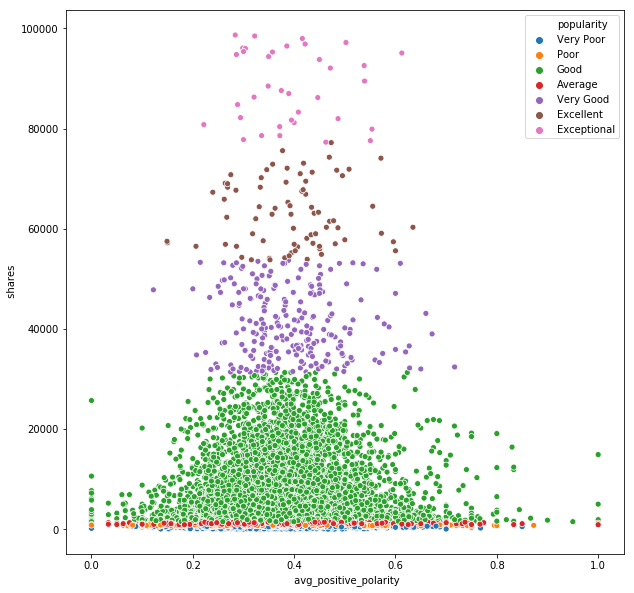

In [18]:
# attempt polartiy
temp_data = data[data[' shares'] <= 100000]
fig, axes = plt.subplots(figsize=(10,10))
sns.scatterplot(x=' avg_positive_polarity', y=' shares', hue='popularity', data=temp_data, ax=axes)

'\navg_positive_polarity and avg_negative_polarity are good features with some clear observation \n'

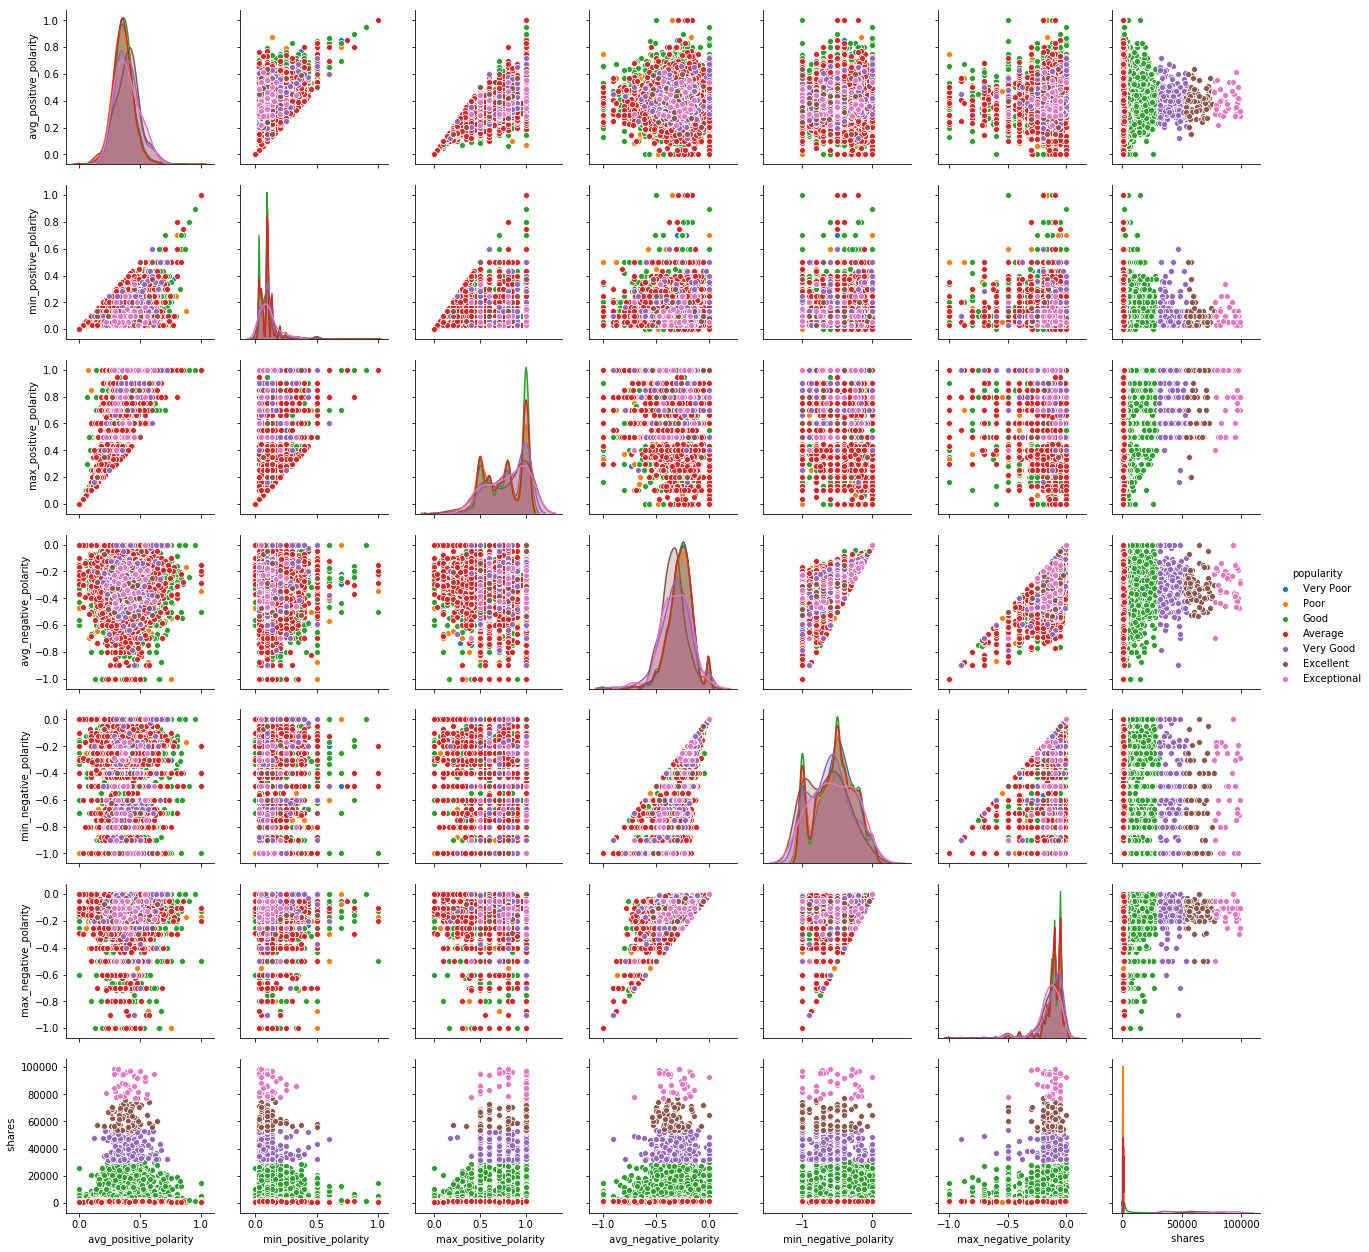

In [19]:
#Finding relationship between 'rate_positive_words', 'rate_negative_words', 'global_rate_positive_words', 'global_rate_negative_words', and 'shares'
temp_data = data[data[' shares'] <= 100000]
# running a pair plot for the terms
kw_cols = [' avg_positive_polarity', ' min_positive_polarity', ' max_positive_polarity', ' avg_negative_polarity', ' min_negative_polarity', ' max_negative_polarity', ' shares']
# run a pairplot
sns.pairplot(temp_data, vars=kw_cols, hue='popularity', diag_kind='kde')

'''
avg_positive_polarity and avg_negative_polarity are good features with some clear observation 
'''

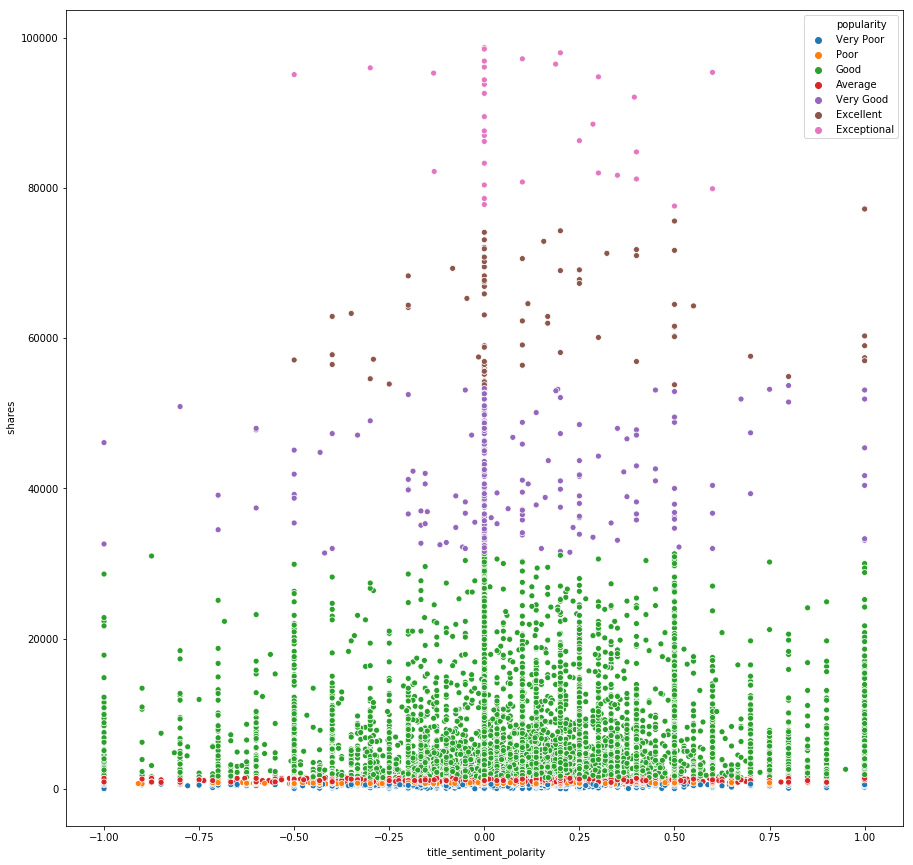

In [20]:
# attempt title_subjectivity
temp_data = data[data[' shares'] <= 100000]
fig, axes = plt.subplots(figsize=(15,15))
sns.scatterplot(x=' title_sentiment_polarity', y=' shares', hue='popularity', data=temp_data, ax=axes)

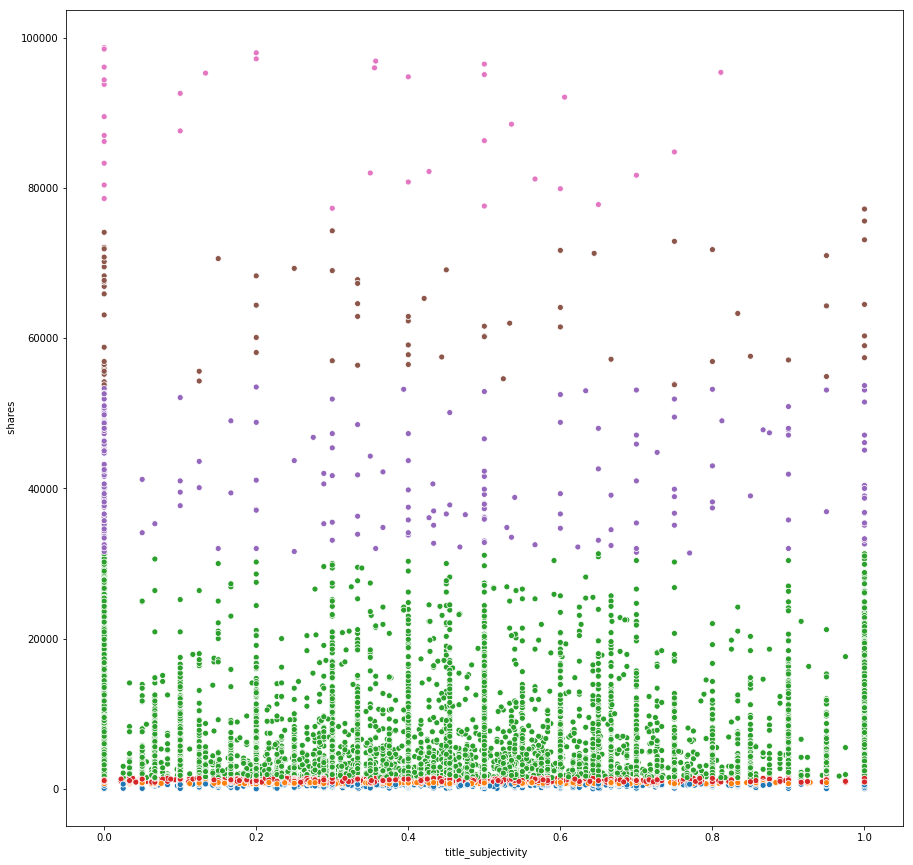

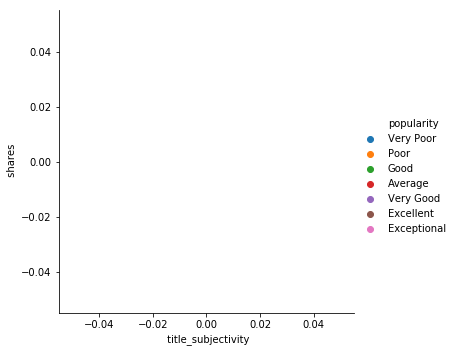

In [21]:
# attempt title_subjectivity
temp_data = data[data[' shares'] <= 100000]
fig, axes = plt.subplots(figsize=(15,15))
sns.relplot(x=' title_subjectivity', y=' shares', hue='popularity', data=temp_data, ax=axes)

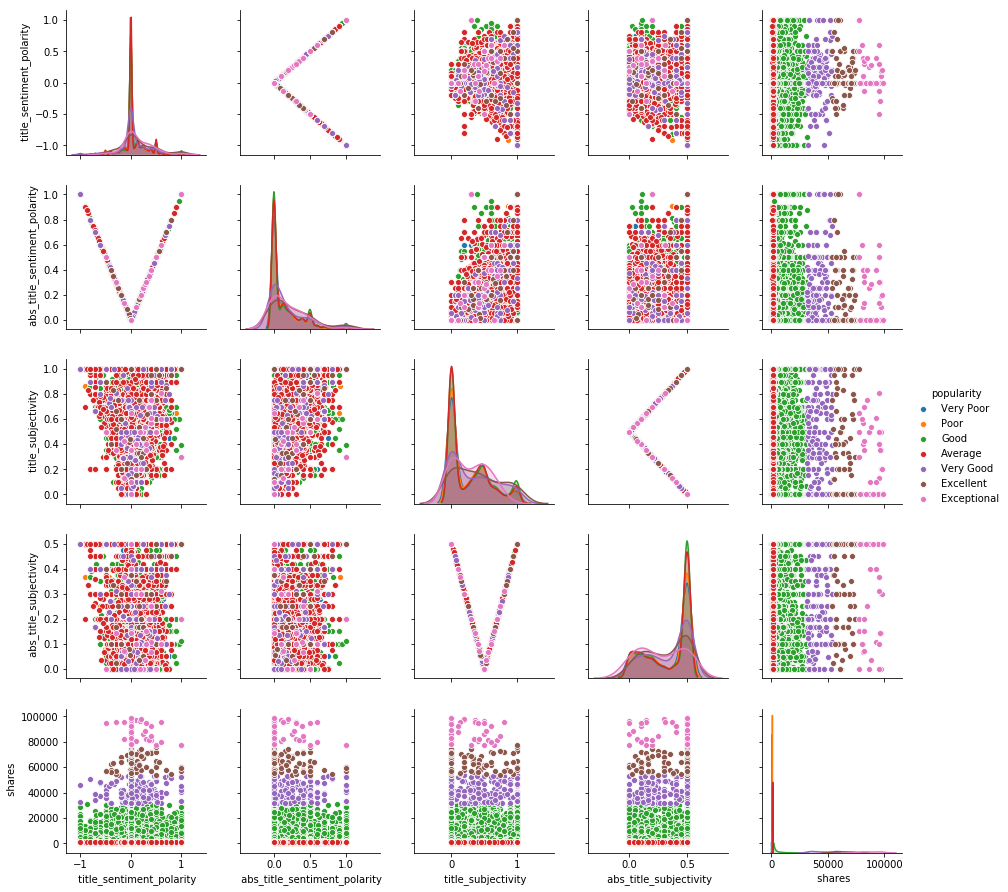

In [22]:
temp_data = data[data[' shares'] <= 100000]
# running a pair plot for the kw__terms
kw_cols = [' title_sentiment_polarity', ' abs_title_sentiment_polarity', ' title_subjectivity', ' abs_title_subjectivity', ' shares']
# run a pairplot
sns.pairplot(temp_data, vars=kw_cols, hue='popularity', diag_kind='kde')

### Evaluating Expectations

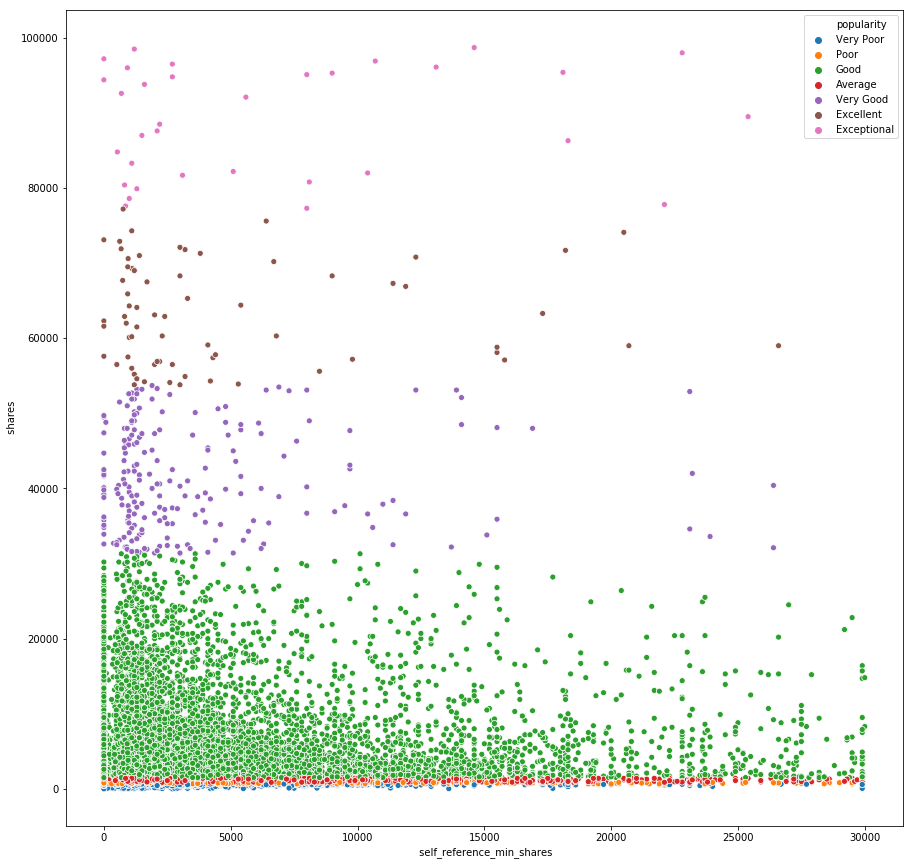

In [23]:
# attempt self_reference_min_shares
temp_data = data[(data[' shares'] <= 100000) & (data[' self_reference_min_shares'] <= 30000)]
fig, axes = plt.subplots(figsize=(15,15))
sns.scatterplot(x=' self_reference_min_shares', y=' shares', hue= 'popularity', data=temp_data, ax=axes)

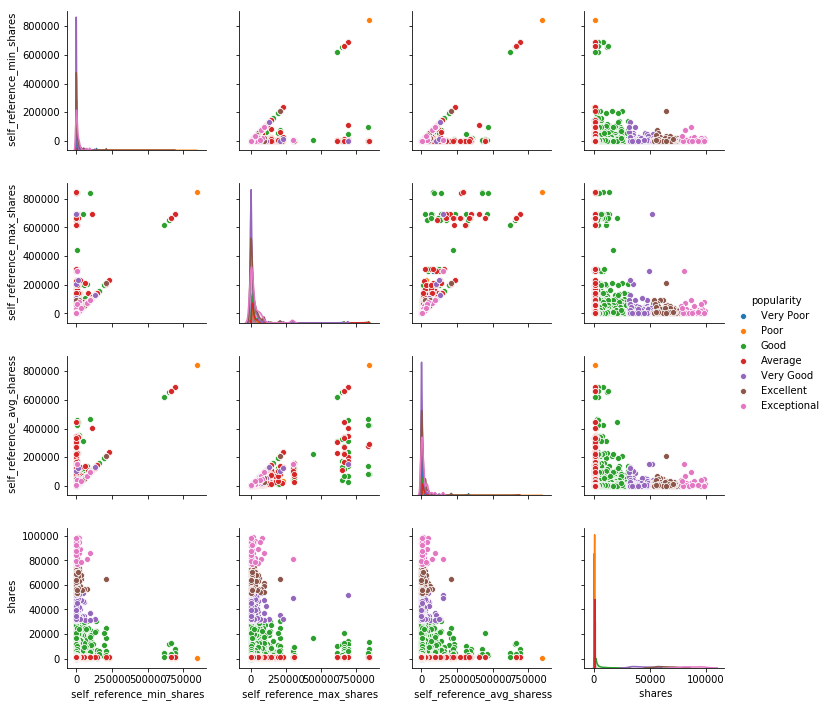

In [24]:
temp_data = data[data[' shares'] <= 100000]
# running a pair plot for the kw__terms
kw_cols = [' self_reference_min_shares', ' self_reference_max_shares', ' self_reference_avg_sharess', ' shares']
# run a pairplot
sns.pairplot(temp_data, vars=kw_cols, hue='popularity', diag_kind='kde')

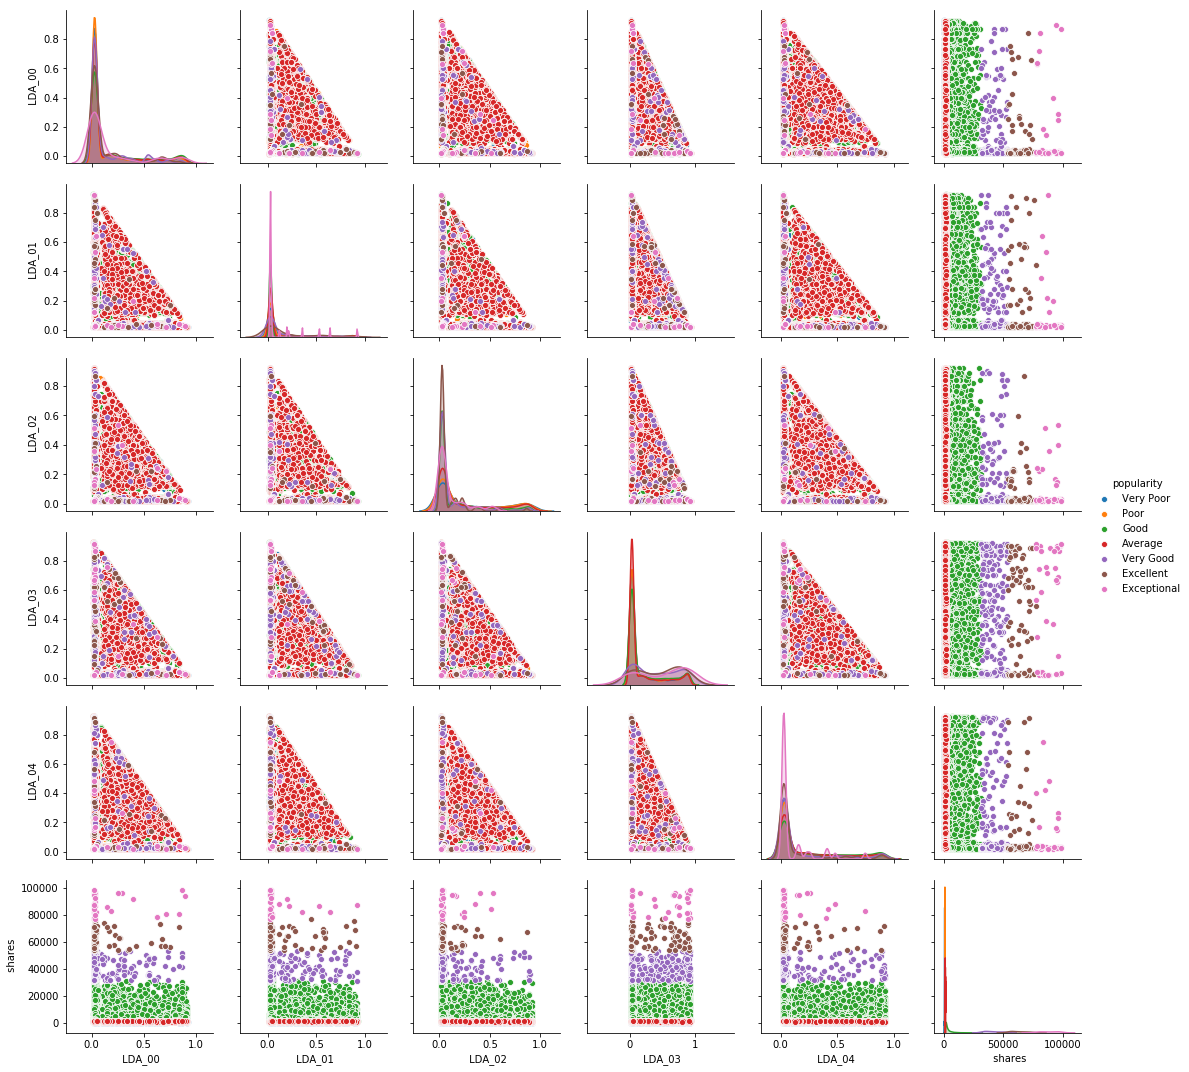

In [25]:
#### LDA - 0: 5
temp_data = data[data[' shares'] <= 100000]
# running a pair plot for the kw__terms
kw_cols = [' LDA_00', ' LDA_01', ' LDA_02', ' LDA_03', ' LDA_04', ' shares']
# run a pairplot
sns.pairplot(temp_data, vars=kw_cols, hue='popularity', diag_kind='kde')

#### Weekdays Variable Effect


In [26]:
# extact the weekdays articles distrubution
weekdays_data = data.groupby('weekdays').size().reset_index()
weekdays_data.columns = ['weekdays','count']
weekdays_data

weekdays  count
0     Friday   5538
1     Monday   6471
2   Saturday   2369
3     Sunday   2657
4   Thursday   7052
5     Tueday   7170
6  Wednesday   7205

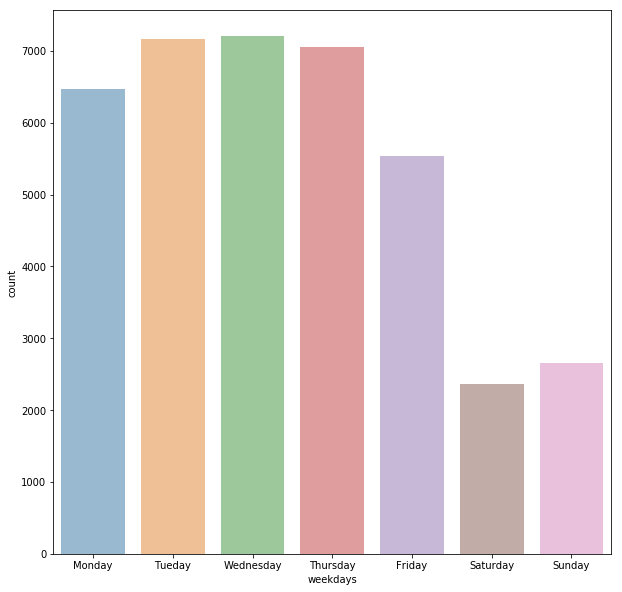

In [27]:
# shows the days when articles are usually posted
fig, axes = plt.subplots(figsize=(10,10))
ax = sns.countplot(x='weekdays',data=data,alpha=0.5, ax=axes)

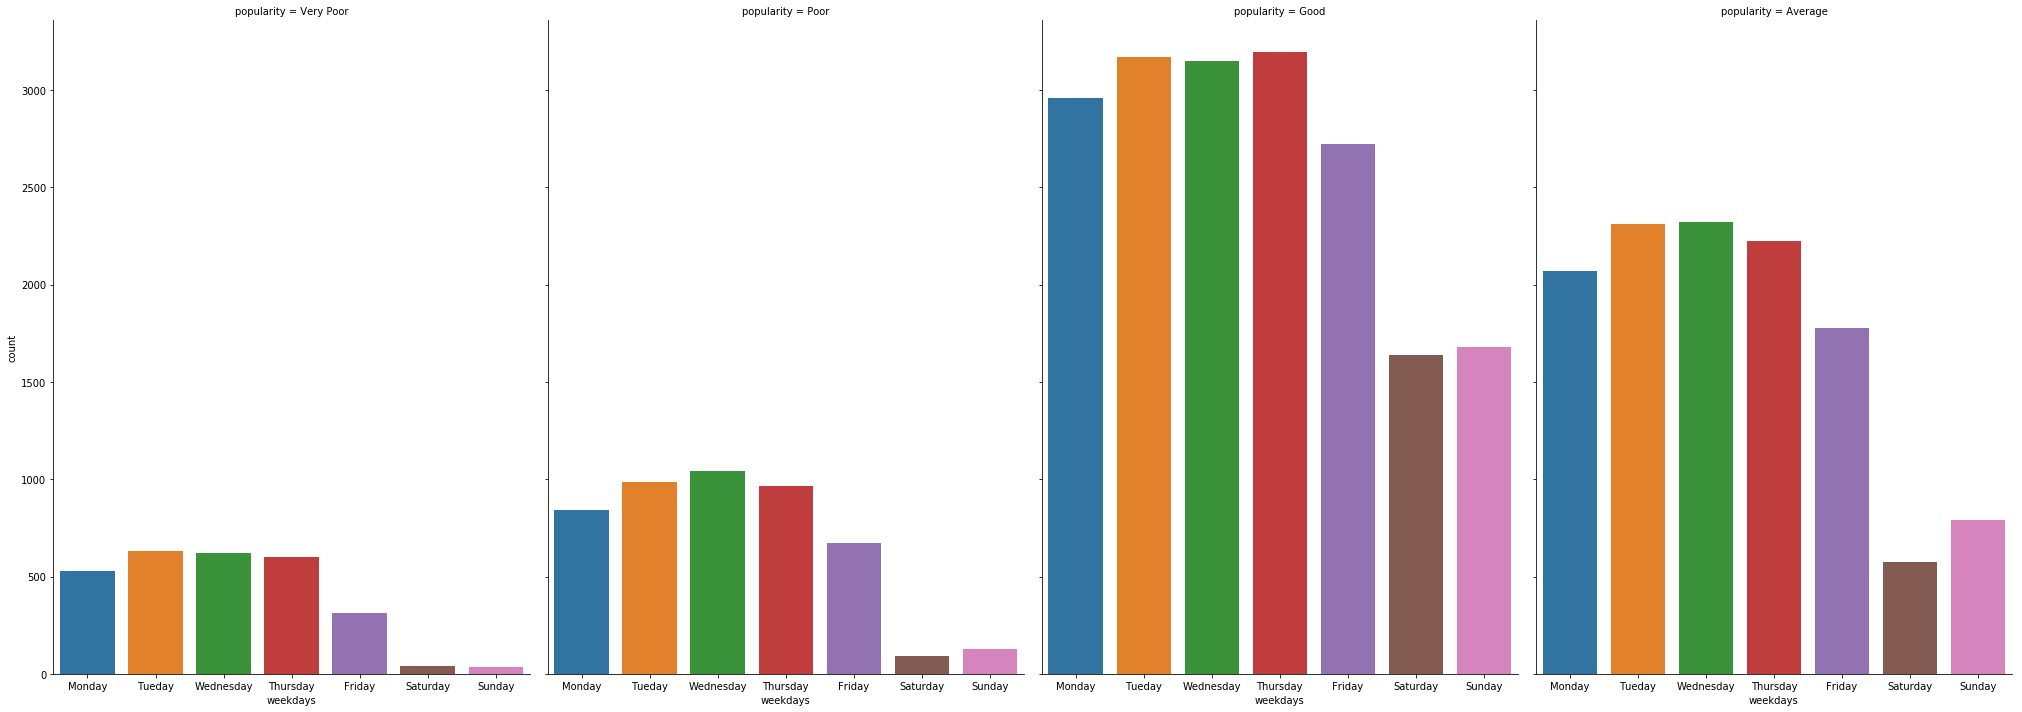

In [28]:
# shows relationship with the number of shares and the weekdays
temp_data = data[(data['popularity'] == 'Very Poor') | (data['popularity'] == 'Poor') | (data['popularity'] == 'Average') | (data['popularity'] == 'Good')]
ax = sns.catplot(x='weekdays', col="popularity", data=temp_data, kind="count", height=10, aspect=.7)

'\n'

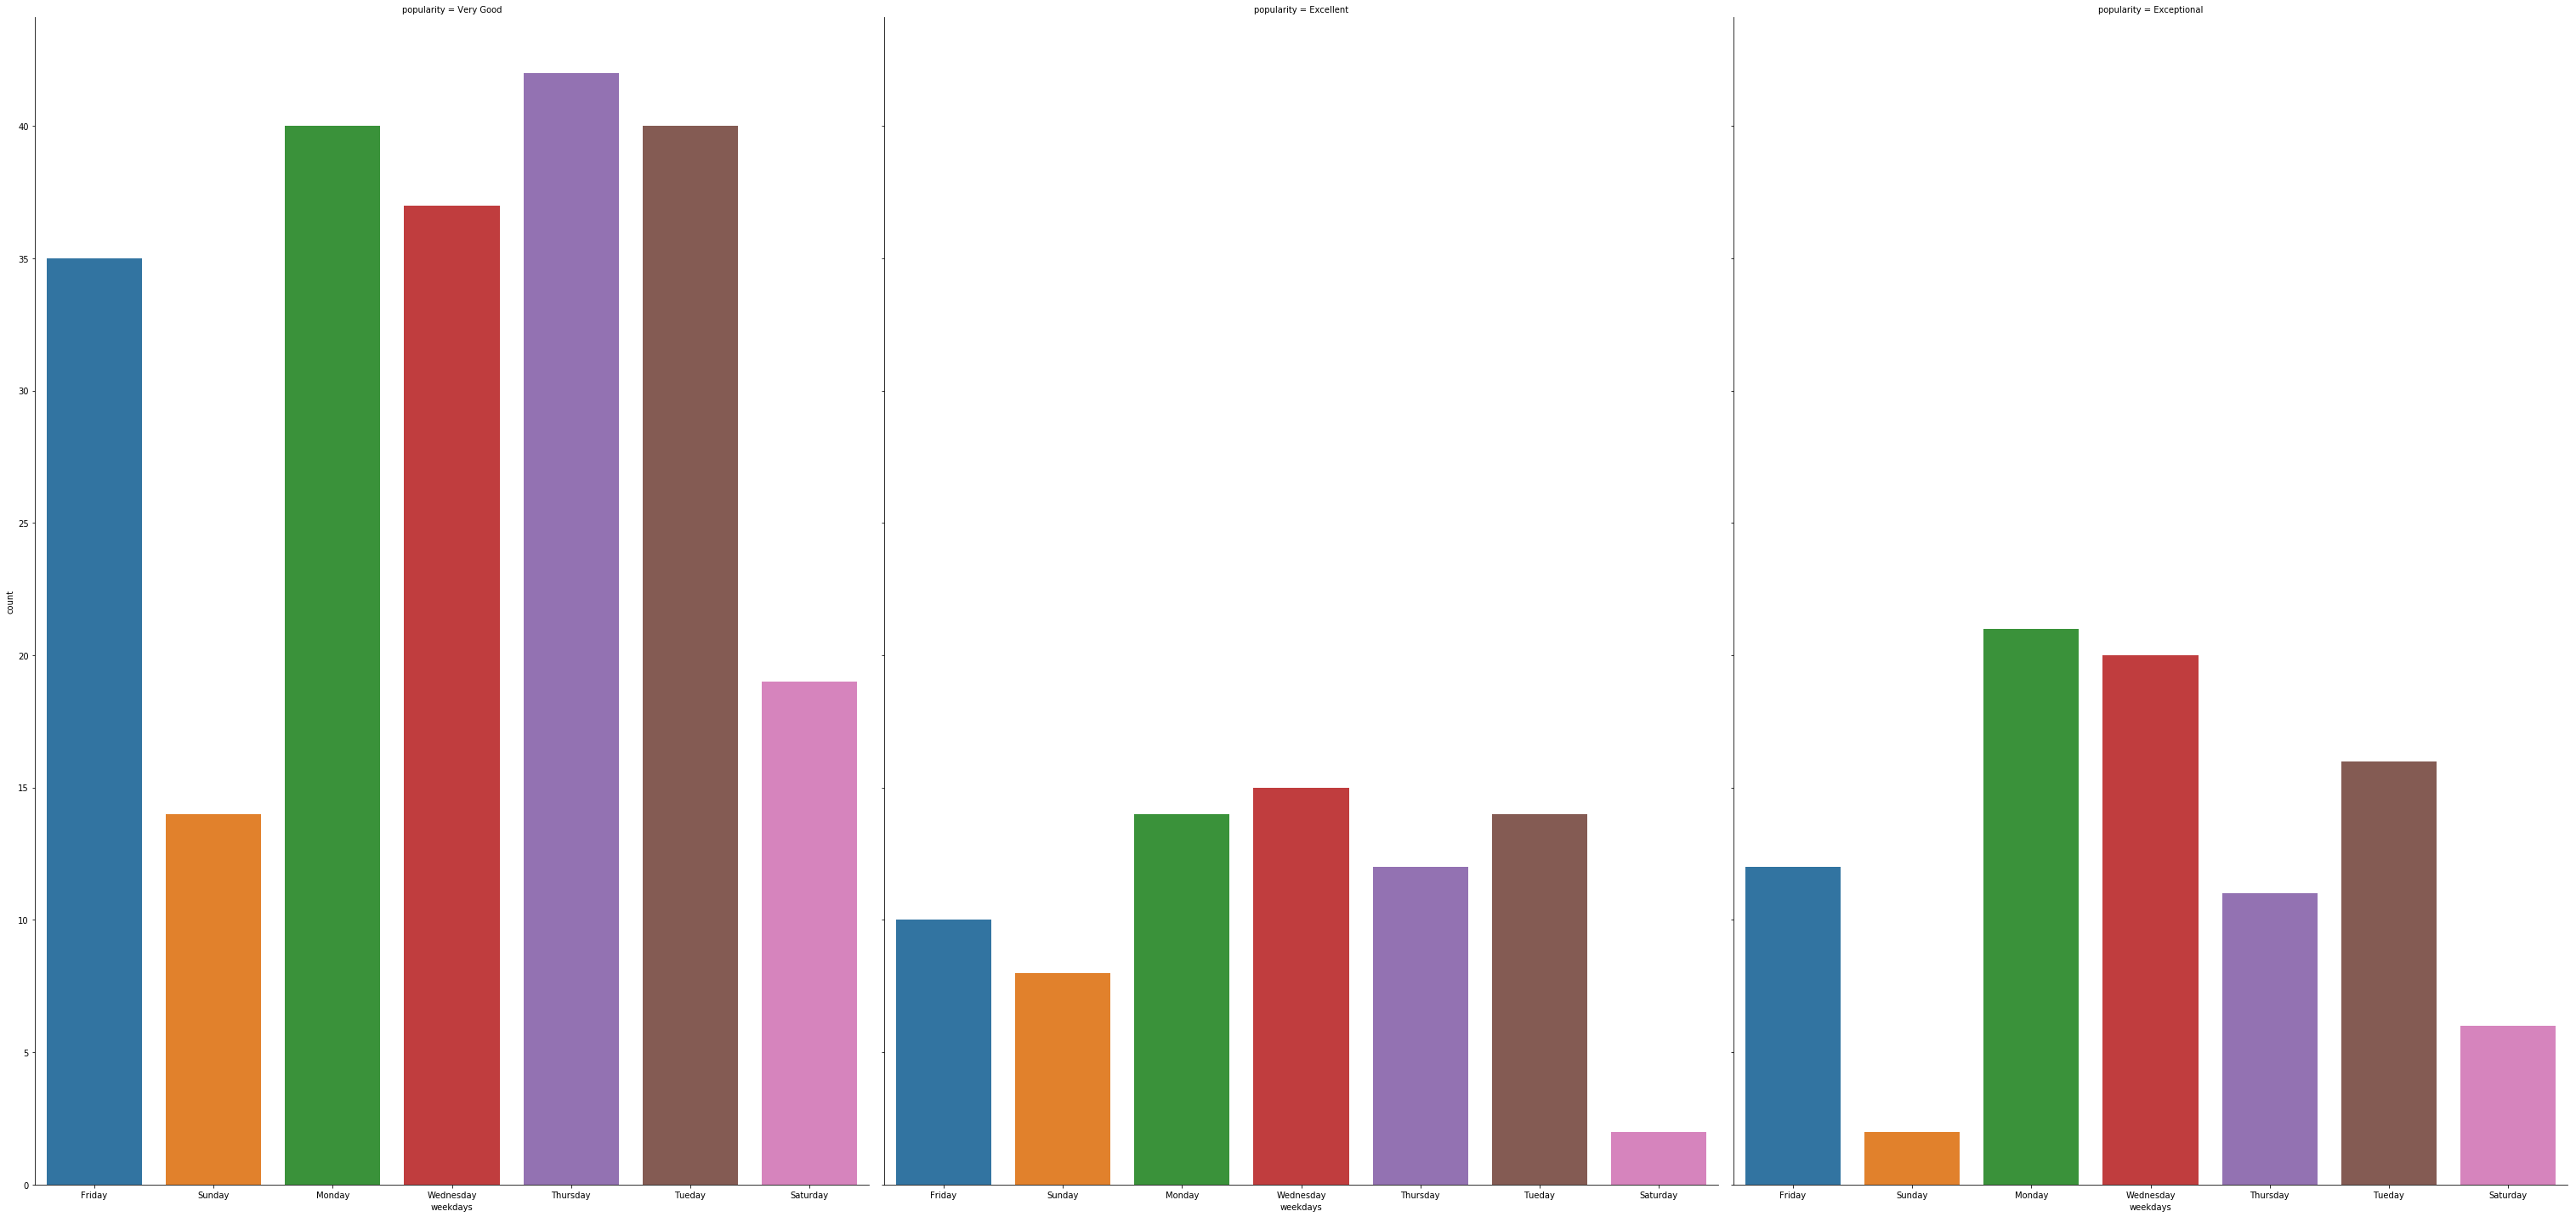

In [29]:
# shows relationship with the number of shares and the weekdays (compare only the best three popularity)
temp_data = data[(data['popularity'] == 'Exceptional') | (data['popularity'] == 'Excellent') | (data['popularity'] == 'Very Good')]
ax = sns.catplot(x='weekdays', col="popularity", data=temp_data, kind="count", height=20, aspect=.7)

'''
'''

It appears that the most popular articles tend to be published on Mondays and Wednesdays, with a slight increase on Tuesdays. Conversely, Sundays and Saturdays, or weekends in general, seem to be the least favorable days for publishing articles, with lower chances of success.

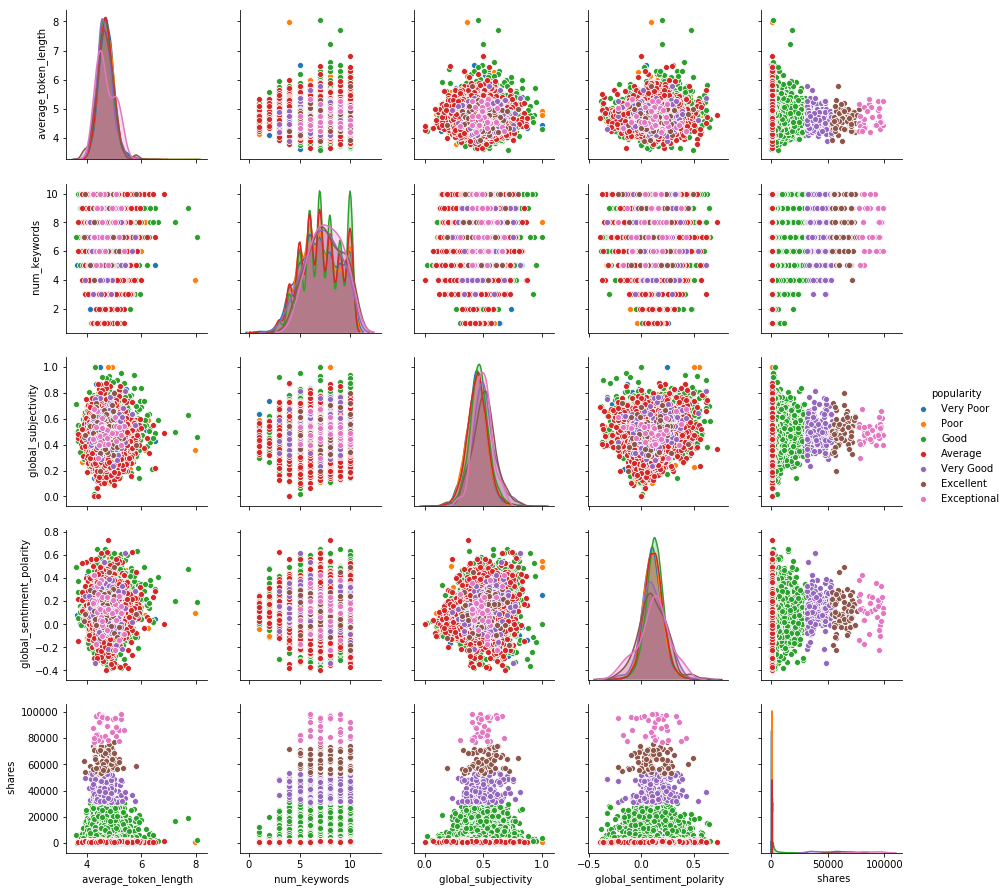

In [30]:
temp_data = data[data[' shares'] <= 100000]
# running a pair plot for the kw__terms
kw_cols = [' average_token_length', ' num_keywords', ' global_subjectivity', ' global_sentiment_polarity', ' shares']
# run a pairplot
sns.pairplot(temp_data, vars=kw_cols, hue='popularity', diag_kind='kde')

#### Data Channel Evaluation
In this analysis, it's evident that articles in the "Others" channel hold the top spot in terms of share popularity. When focusing on more specific channels, "Business" and "Entertainment" channels are prominent for achieving high popularity. Following them are the "World" and "Tech" channels, occupying the third position. Generally, Tech channels have an average performance. A notable observation is the consistent presence of "Entertainment" channel articles across all levels of popularity, indicating that they might not always be the most reliable channel for publishing.

In [31]:
## Seeing the distribution of the articles across the data channels
# extact the weekdays articles distrubution
data_channel_data = data.groupby('data_channel').size().reset_index()
data_channel_data.columns = ['Data Channels','No of articles']
data_channel_data


Data Channels  No of articles
0       Business            6235
1  Entertainment            6855
2      Lifestyle            2077
3         Others            5491
4   Social Media            2311
5           Tech            7325
6          World            8168

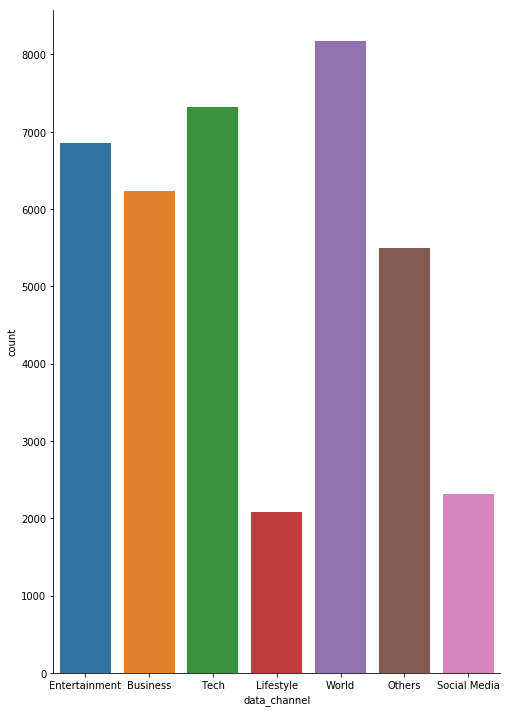

In [32]:
# Shows the distribution of the articles across the channels
sns.catplot(x='data_channel', data=data, kind="count", height=10, aspect=.7)

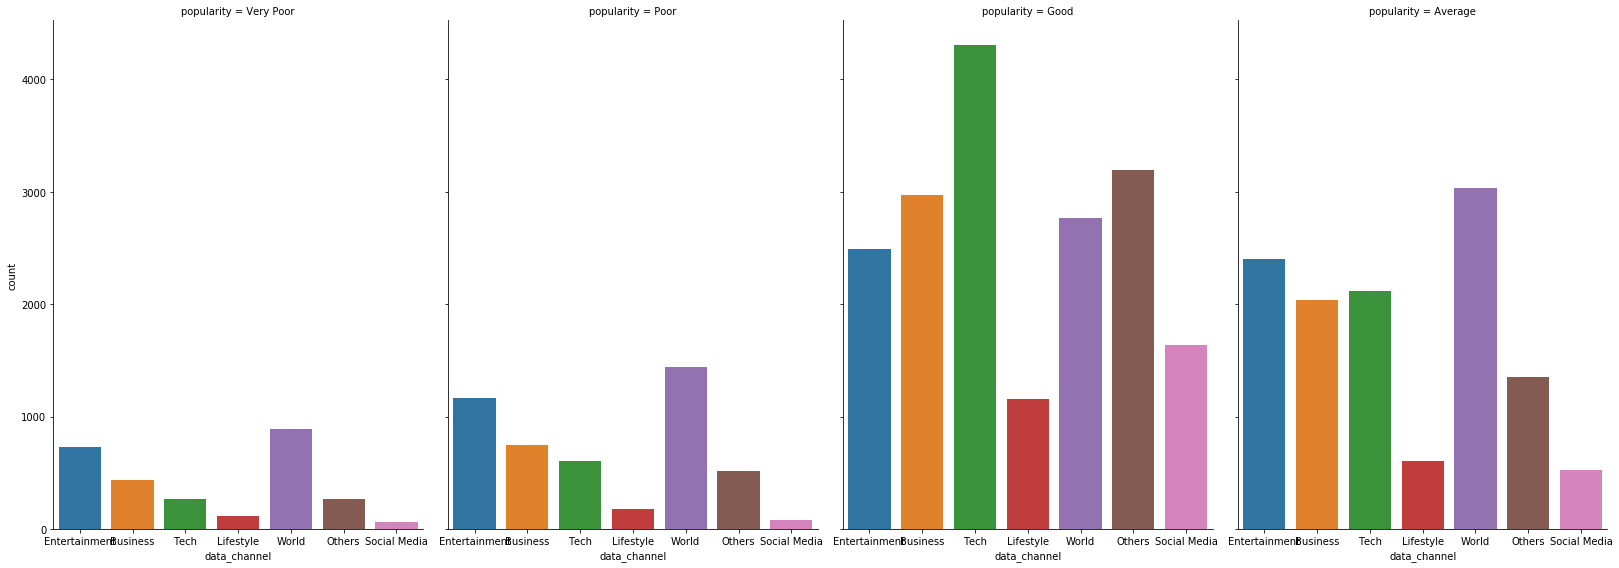

In [33]:
#the ranking of the channels in regards to the shares popularity
temp_data = data[(data['popularity'] == 'Very Poor') | (data['popularity'] == 'Poor') | (data['popularity'] == 'Average') | (data['popularity'] == 'Good')]
ax = sns.catplot(x='data_channel', col="popularity", data=temp_data, kind="count", height=8, aspect=.7)

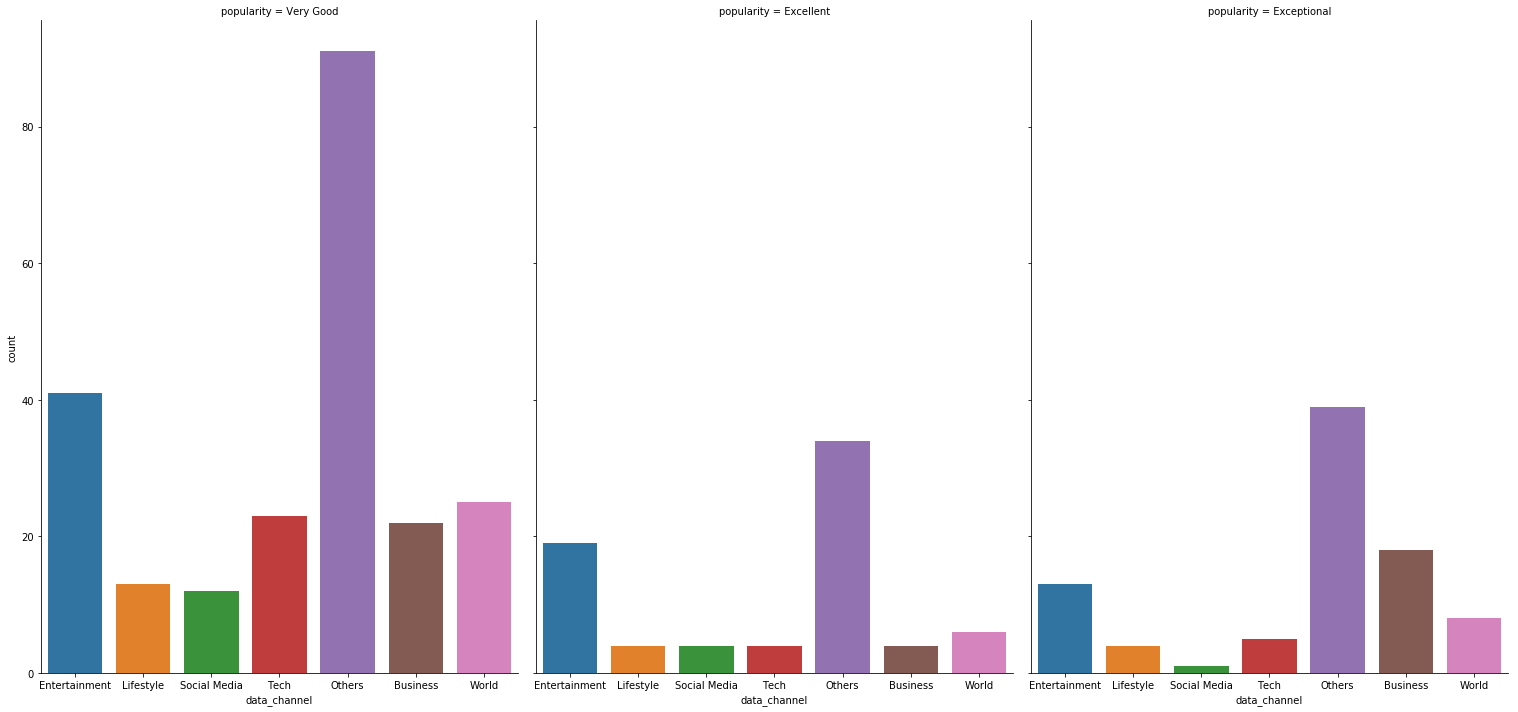

In [34]:
# shows relationship with the number of shares and the ranking of the channels (compare only the best three popularity)
temp_data = data[(data['popularity'] == 'Exceptional') | (data['popularity'] == 'Excellent') | (data['popularity'] == 'Very Good')]
ax = sns.catplot(x='data_channel', col="popularity", data=temp_data, kind="count", height=10, aspect=.7)


### Evaluating the Observerd Hypothesis

#### Data channels vs Num_images vs popularity
In this analysis, we examined the relationship between the number of images in articles and their popularity, across different data channels.
Previously, we noted that articles considered to be of good quality often feature a high number of images, but this isn't a universal rule.
A notable exception to this trend is observed in the Business channel. According to the provided plot, the number of images in Business channel articles doesn't significantly impact their popularity. These articles typically have a low number of images, regardless of how popular they are, which is an interesting pattern.
On the other hand, articles in the Entertainment channel usually show an increase in the number of images as their popularity grows. The only deviation from this trend is seen in articles with 'Average' popularity.

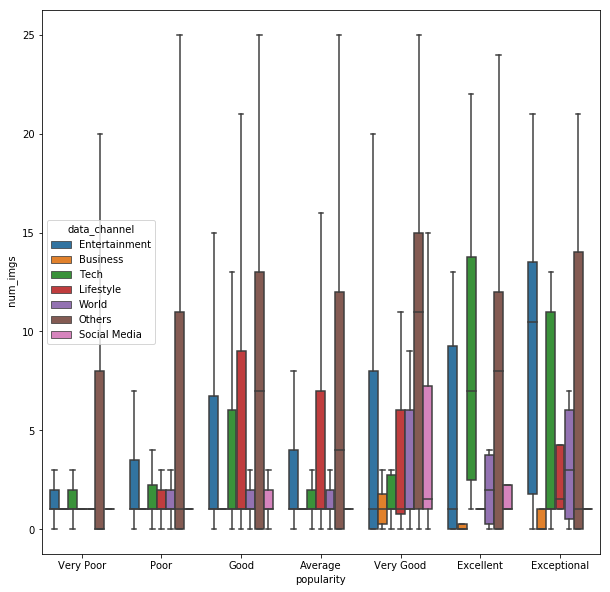

In [35]:
fig,ax = plt.subplots(figsize=(10,10))
temp_data = data[data[' num_imgs'] <= 25]
sns.boxplot(x='popularity',y=' num_imgs', hue='data_channel', data=temp_data, showfliers=False)

# Making Recommendations For Good Articles
- Keep n_tokens_content under 1500 words; shorter is generally better.
- n_tokens_title should range from 6 to 17 words.
- Aim for n_unique_tokens to be between 0.3 and 0.8.
- Include 1 to 40 external links (num_hrefs).
- Have 1 to 40 images (num_imgs) in the article.
- Limit num_videos to 0 - 25, as more videos can decrease the odds of popularity.
- Ensure the average_token_length stays within 4 to 6 characters.
- Having more keywords in the metadata significantly boosts share potential. Ideally, have more than 5 keywords.
- Articles in the "Others" channel often see the highest share popularity, followed by those in "Business" and - - - "Entertainment" channels. "World" and "Tech" channels are also good choices, ranking third.
- Articles posted on Mondays and Wednesdays (including some Tuesdays) tend to be more popular, while weekends, - - - especially Sundays and Saturdays, are the least effective days for publishing.
- Content discussing current trends tends to garner more shares.

> > The scatterplot indicates that articles of good quality typically have an n_tokens_content count between 100 and 2000 words.

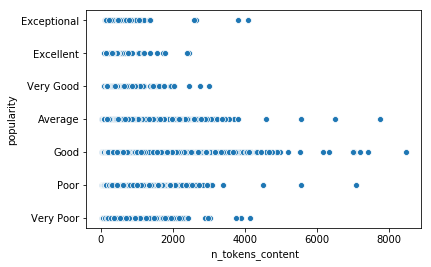

In [36]:
#n_tokens_content
sns.scatterplot(x=' n_tokens_content',y='popularity', data=data)

> > The scatterplot suggests that the titles of well-received articles usually contain between 6 and 17 words.

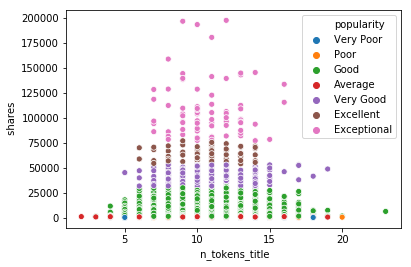

In [37]:
#n_tokens_title
temp_data = data[data[' shares'] <= 200000]
sns.scatterplot(x=' n_tokens_title',y=' shares', hue='popularity', data=temp_data)

>> similar to the above. 

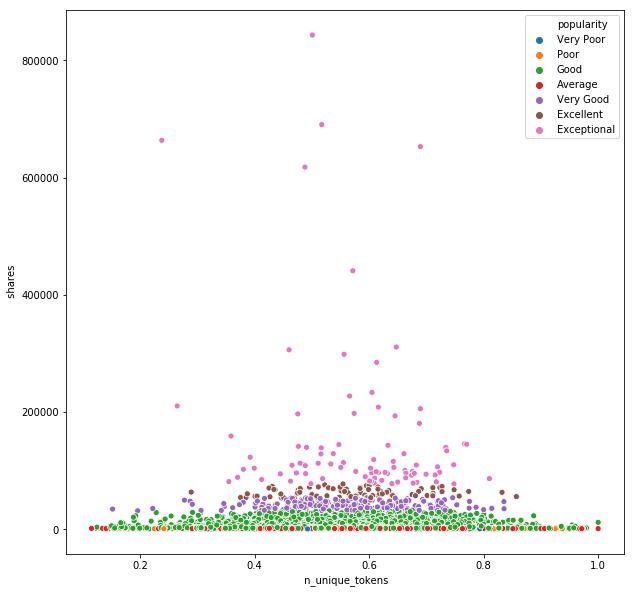

In [38]:
#n_tokens_title
temp_data = data[data[' shares'] <= 200000]
plt.figure(figsize=(10,10))
sns.scatterplot(x=' n_unique_tokens',y=' shares', hue='popularity', data=data)

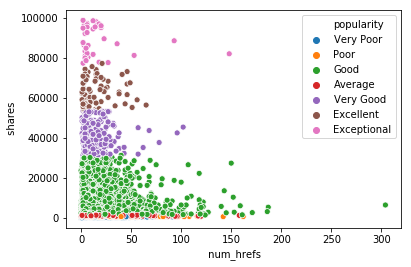

In [39]:
#num_hrefs
temp_data = data[data[' shares'] <= 100000]
sns.scatterplot(x=' num_hrefs',y=' shares', hue='popularity', data=temp_data)

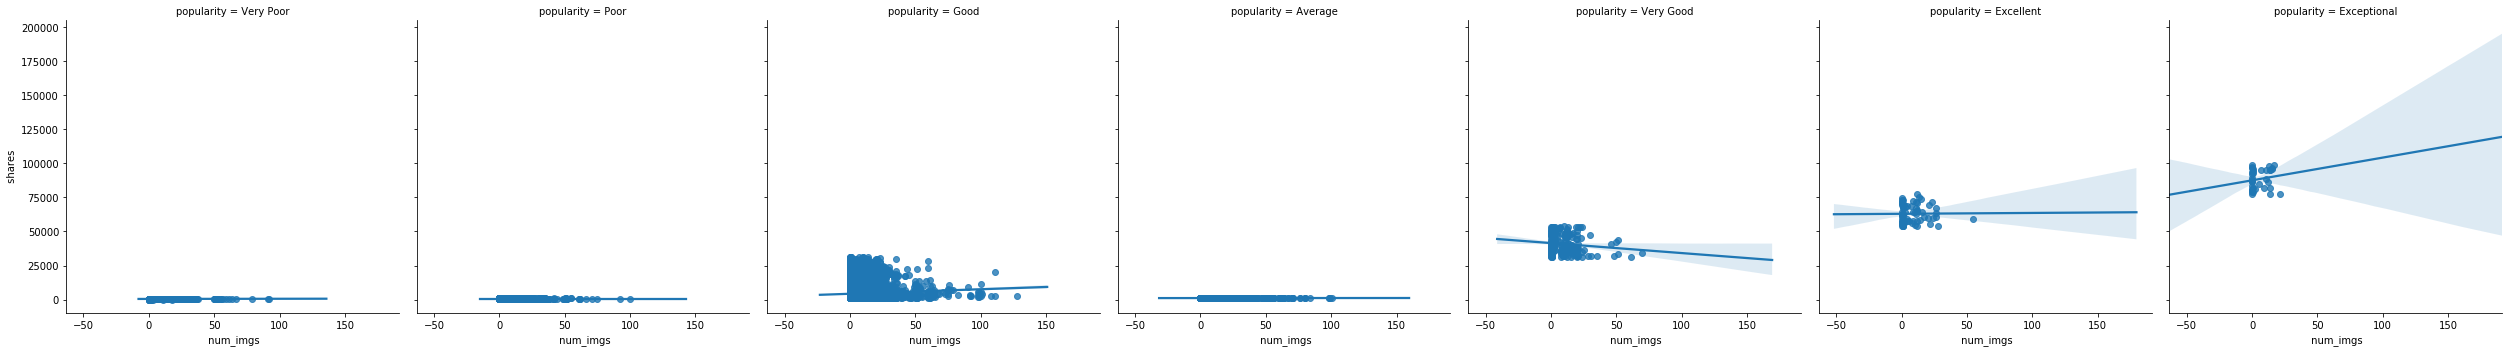

In [40]:
#num_imgs
temp_data = data[data[' shares'] <= 100000]
#plt.figure(figsize=(30,10))
#sns.barplot(x=' num_imgs',y=' shares', hue='popularity', data=temp_data)
sns.lmplot(x=' num_imgs', y=' shares', col='popularity', data=temp_data)

(24660, 48)


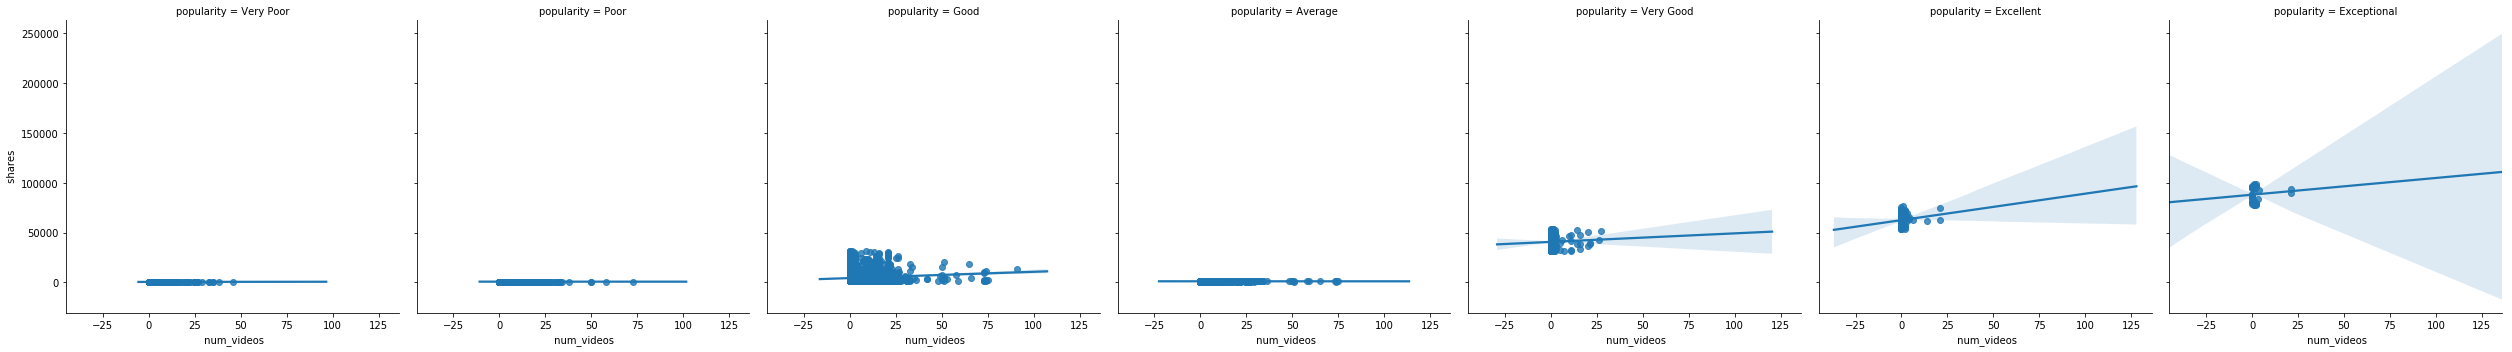

In [41]:
#num_videos
temp_data = data[data[' shares'] <= 100000]
noise_data  = data[data[' num_videos'] == 0]
print (noise_data.shape)
#plt.figure(figsize=(30,10))
#sns.barplot(x=' num_imgs',y=' shares', hue='popularity', data=temp_data)
sns.lmplot(x=' num_videos', y=' shares', col='popularity', data=temp_data)

(0, 48)


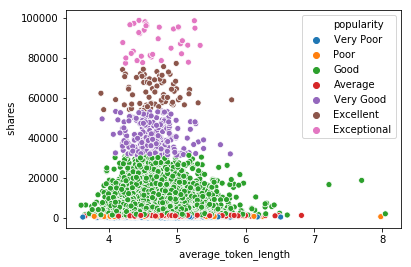

In [42]:
#average_token_length
temp_data = data[data[' shares'] <= 100000]
noise_data  = data[data[' average_token_length'] == 0]
print (noise_data.shape)
#plt.figure(figsize=(30,10))
sns.scatterplot(x=' average_token_length',y=' shares', hue='popularity', data=temp_data)

(0, 48)


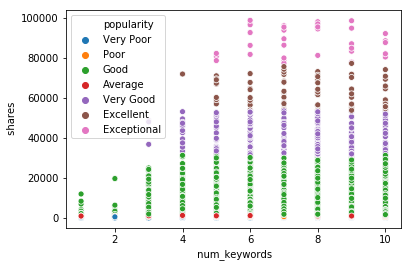

In [43]:
#num_keywords
temp_data = data[data[' shares'] <= 100000]
noise_data  = data[data[' num_keywords'] == 0]
print (noise_data.shape)
#plt.figure(figsize=(30,10))
sns.scatterplot(x=' num_keywords',y=' shares', hue='popularity', data=temp_data)

(5993, 48)


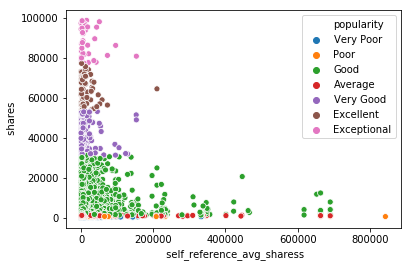

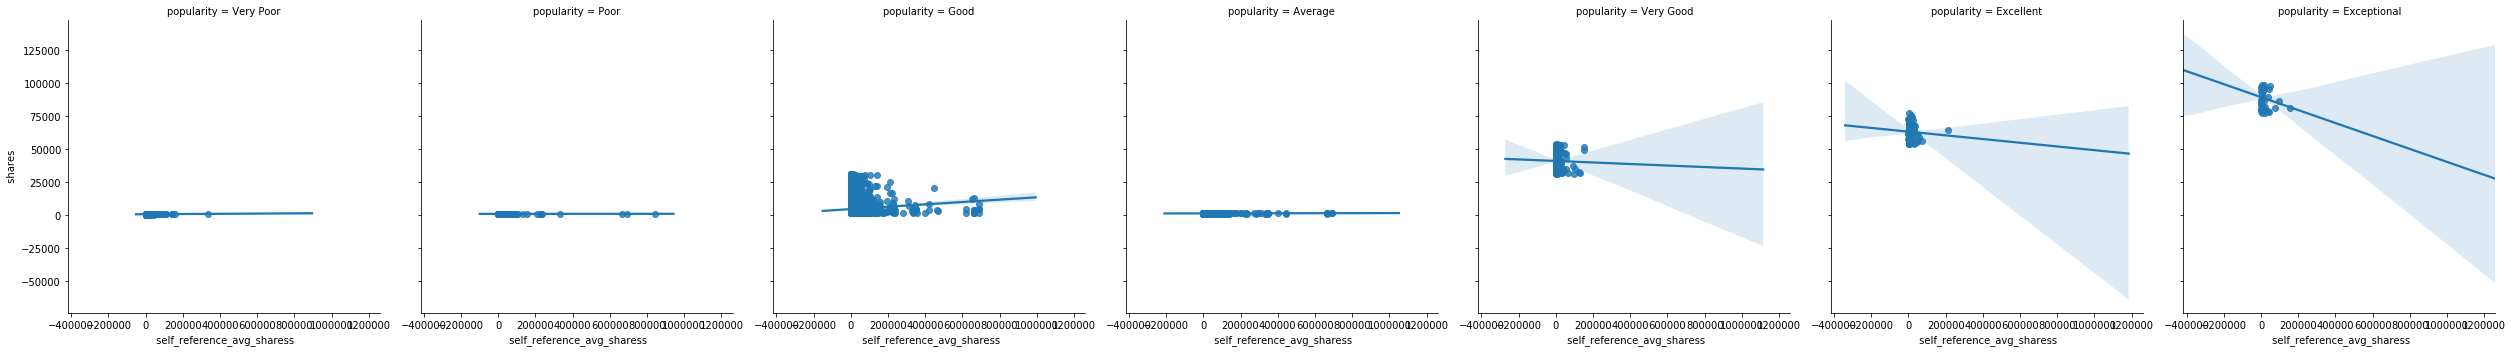

In [44]:
#self_reference_avg_sharess
temp_data = data[data[' shares'] <= 100000]
noise_data  = data[data[' self_reference_avg_sharess'] == 0]
print (noise_data.shape)
#plt.figure(figsize=(30,10))
sns.scatterplot(x=' self_reference_avg_sharess',y=' shares', hue='popularity', data=temp_data)
sns.lmplot(x=' self_reference_avg_sharess', y=' shares', col='popularity', data=temp_data)

 ## Normal Distribution analysis for 'Shares'
  - What we refer to as normality implies that the data should resemble a normal distribution. This aspect is crucial because many statistical tests, such as t-statistics, and certain machine learning models depend on this characteristic. We have assessed how this normality influences the performance of our models.

In [45]:
print("Skewness: %f" % data[' shares'].skew())
print("Kurtosis: %f" % data[' shares'].kurt())


Skewness: 34.952465
Kurtosis: 1909.931080


"\n'Shares' doesn't have a normal distribution. It shows 'peakedness', positive skewness and does not follow the diagonal line.\nThus some statistic analysis might not be suitable for it\n\n"

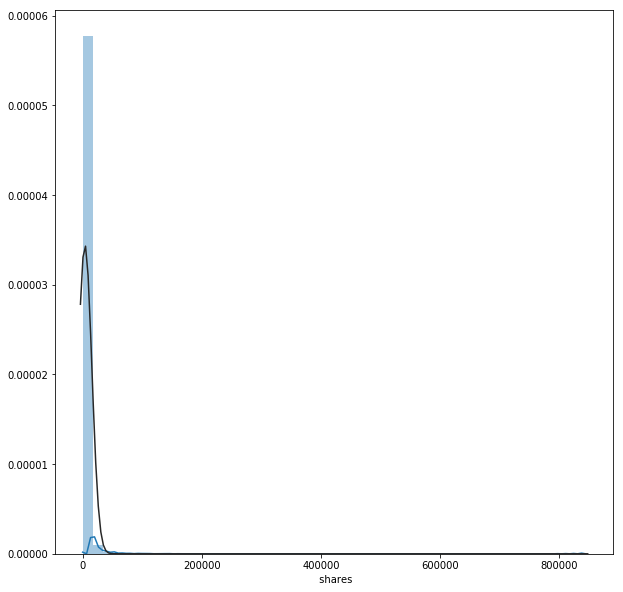

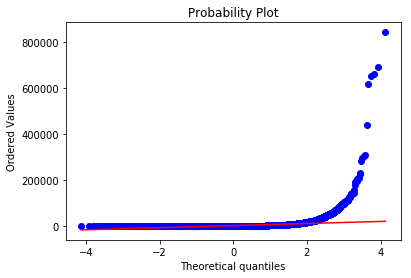

In [46]:
from scipy.stats import norm, probplot

#histogram and normal probability plot
temp_data = data[data[' shares'] <= 100000]
fig,ax = plt.subplots(figsize=(10,10))
sns.distplot(data[' shares'], fit=norm);
fig = plt.figure()
res = probplot(data[' shares'], plot=plt)
'''
'Shares' doesn't have a normal distribution. It shows 'peakedness', positive skewness and does not follow the diagonal line.
Thus some statistic analysis might not be suitable for it

'''

Although the shares data doesn't display a normal distribution initially, applying a log transformation can effectively convert it into a dataset with a normal distribution.

In [47]:
from copy import copy

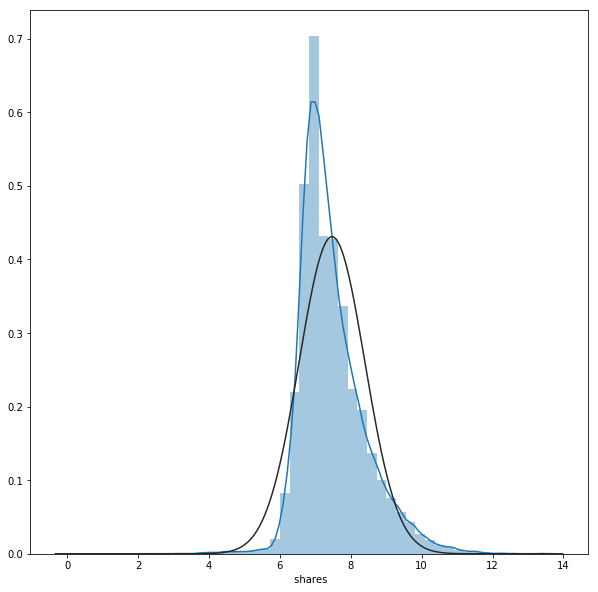

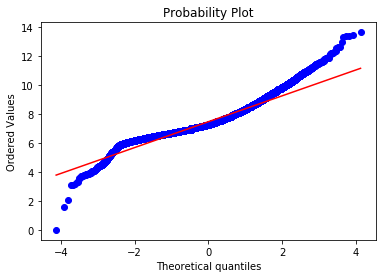

In [48]:
#applying log transformation
new_shares_data = copy(data)

new_shares_data.loc[new_shares_data[' shares'] > 0, ' shares'] = np.log(data.loc[data[' shares'] > 0, ' shares'])
new_shares_log = new_shares_data[' shares']
#transformed histogram and normal probability plot
fig,ax = plt.subplots(figsize=(10,10))
sns.distplot(new_shares_log, fit=norm);
fig = plt.figure()
res = probplot(new_shares_log, plot=plt)

In [49]:
#Check for missing data
total = new_shares_data.isnull().sum().sort_values(ascending=False)
percent = (new_shares_data.isnull().sum()/new_shares_data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head()

Total  Percent
popularity                      0      0.0
 shares                         0      0.0
 self_reference_min_shares      0      0.0
 kw_avg_avg                     0      0.0
 kw_max_avg                     0      0.0

# Feature Selection/Dimensionality Reduction
- We will be identifying the most effective features from the data, taking into account the following criteria:
  - Selecting features based on the strongest hypotheses observed.
  - Comprehensive feature selection across the entire dataset.
  - Applying Fisher's discriminant analysis for feature selection.
  - Choosing features based on the best hypotheses, but ensuring they conform to a normal distribution through log transformation.
  - Utilizing Fisher's discriminant analysis on a dataset that has been normalized.
  - Complete feature selection across the entire dataset, focusing on those that exhibit a normal distribution.

#### Feature Selection on the whole dataset


In [50]:
# shares data is not needed for classification
data_without_shares = data.drop(labels=[' shares'], axis = 1, inplace=False)

training_set = data_without_shares.iloc[:, :(data_without_shares.shape[1]-1)]
# convert categorical variables into dummy - it use one-hot encoding
training_set = pd.get_dummies(training_set)

# extract the label data in this case popularity
label_set = data_without_shares.iloc[:, (data_without_shares.shape[1]-1):].values

data_feature2 = copy(training_set)

#### Feature selection based on best hypothesis observed

In [51]:
# only the best observed features are extracted here
data_feature1 =training_set[[' n_tokens_title',' n_tokens_content',' n_unique_tokens',' num_hrefs',
                       ' num_self_hrefs',' num_imgs',' num_videos',' average_token_length',' num_keywords',
                       ' kw_avg_avg',' self_reference_avg_sharess',' global_subjectivity',
                       ' global_sentiment_polarity',' global_rate_positive_words',' global_rate_negative_words',' avg_positive_polarity',
                       ' avg_negative_polarity',' title_sentiment_polarity','weekdays_Friday', 'weekdays_Monday', 'weekdays_Saturday',
       'weekdays_Sunday', 'weekdays_Thursday', 'weekdays_Tueday',
       'weekdays_Wednesday', 'data_channel_Business',
       'data_channel_Entertainment', 'data_channel_Lifestyle',
       'data_channel_Others', 'data_channel_Social Media', 'data_channel_Tech',
       'data_channel_World']]

In [52]:
data_feature1.columns

Index([' n_tokens_title', ' n_tokens_content', ' n_unique_tokens',
       ' num_hrefs', ' num_self_hrefs', ' num_imgs', ' num_videos',
       ' average_token_length', ' num_keywords', ' kw_avg_avg',
       ' self_reference_avg_sharess', ' global_subjectivity',
       ' global_sentiment_polarity', ' global_rate_positive_words',
       ' global_rate_negative_words', ' avg_positive_polarity',
       ' avg_negative_polarity', ' title_sentiment_polarity',
       'weekdays_Friday', 'weekdays_Monday', 'weekdays_Saturday',
       'weekdays_Sunday', 'weekdays_Thursday', 'weekdays_Tueday',
       'weekdays_Wednesday', 'data_channel_Business',
       'data_channel_Entertainment', 'data_channel_Lifestyle',
       'data_channel_Others', 'data_channel_Social Media', 'data_channel_Tech',
       'data_channel_World'],
      dtype='object')

#### Feature Selection Based on Fisher Discrimating Analysis

In [53]:
# helper function for evalating the fisher ndex
def fisher_index_calc(trainingSet, labelSet):
    (dim1_T, dim2_T) = trainingSet.shape
    (dim1_L, dim2_L) = labelSet.shape

    # create the fisher output variable - A vector of all the features
    fisher_ratios = np.zeros((1, dim2_T), dtype=float).flatten()
    # It's expected that the dim1_T and dim1_L be of the same size, else this input parameters is nulled.
    if dim1_L != dim1_T:
        return fisher_ratios

    # First extract out the number of features available.
    # grouped both data together, and create a pandas dataframe from it.
    train1 = pd.DataFrame(trainingSet)
    label1 = pd.DataFrame(labelSet, columns=['LABEL'])
    grouped = pd.concat([train1, label1], axis=1)

    # fetch the number of classes
    (no_classes, demo) = grouped.groupby('LABEL').count()[[0]].shape
    #print grouped

    # loop through all features
    for j in range(dim2_T):
        # the variance of the feature j
        j_variance = np.var(trainingSet[:,j])
        j_mean = np.mean(trainingSet[:,j])
        j_summation = 0
        for k in range(no_classes):
            output = grouped.groupby('LABEL').count()[[j]]
            k_feature_count = output.iloc[k,0]
            # mean for class k of feature j
            output = grouped.groupby('LABEL').mean()[[j]]
            k_feature_mean = output.iloc[k,0]
            currentSum = k_feature_count * np.square((k_feature_mean - j_mean))
            j_summation = j_summation + currentSum
        fisher_ratios[j] = j_summation / np.square(j_variance)

    return fisher_ratios

In [54]:
# calculates the fisher score of the features
fisher_scores = fisher_index_calc(training_set.values, label_set)

df = pd.DataFrame({'Fisher Ratio For All Features': fisher_scores})


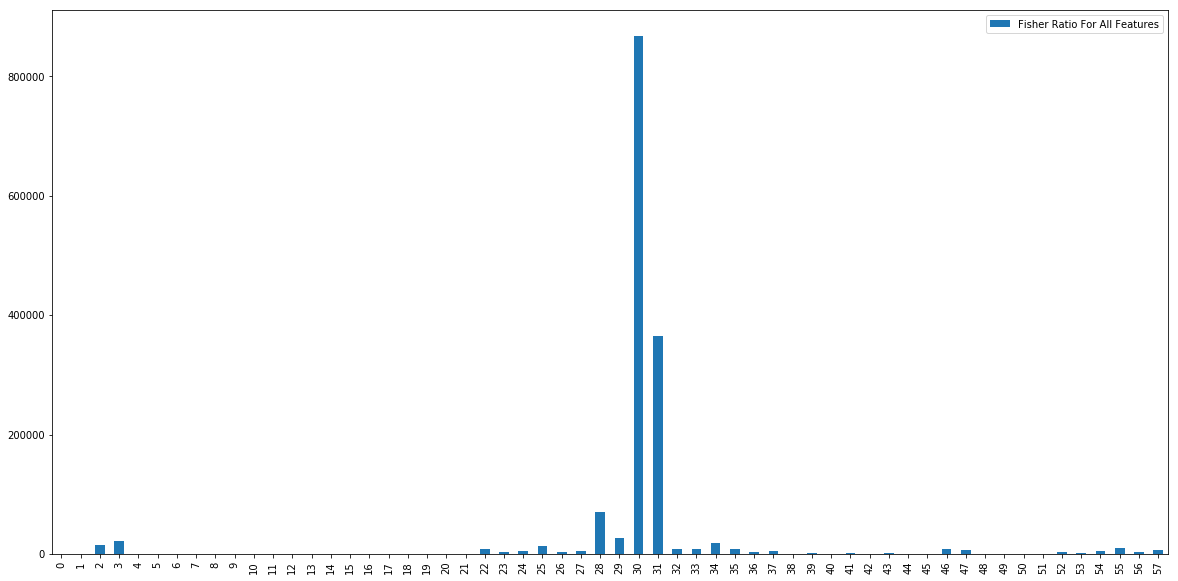

In [55]:
# plot the fisher analysis score
ax = df.plot.bar(figsize=(20,10))
plt.show()

In [56]:
# feature selection based on fisher score
# Fisher Index Ratio Filter - Remove features with low score
# indices of features to remove based on fisher ratios
to_remove = []
for i in range((len(fisher_scores))):
    if fisher_scores[i] < 3000:
        # we mark for removal
        to_remove.append(i)

# remove features with low fisher score
data_feature_fisher = training_set.drop(training_set.columns[to_remove], axis=1, inplace=False)
print ("fisher based features - ", data_feature_fisher.shape)
data_feature_fisher.columns

fisher based features -  (38462, 25)


Index([' n_unique_tokens', ' n_non_stop_unique_tokens', ' is_weekend',
       ' LDA_00', ' LDA_01', ' LDA_02', ' LDA_03', ' LDA_04',
       ' global_subjectivity', ' global_sentiment_polarity',
       ' global_rate_positive_words', ' global_rate_negative_words',
       ' rate_positive_words', ' rate_negative_words',
       ' avg_positive_polarity', ' min_positive_polarity',
       ' max_positive_polarity', ' avg_negative_polarity', 'weekdays_Saturday',
       'weekdays_Sunday', 'data_channel_Entertainment', 'data_channel_Others',
       'data_channel_Social Media', 'data_channel_Tech', 'data_channel_World'],
      dtype='object')

#### Finding the normal distrubution of the dataset

In [57]:
# use log transformation to transform each features to a normal distribution
training_set_normal = copy(training_set)

# note log transformation can only be performed on data without zero value
for col in training_set_normal.columns:
    #applying log transformation
    temp = training_set_normal[training_set_normal[col] == 0]
    # only apply to non-zero features
    if temp.shape[0] == 0:
        training_set_normal[col] = np.log(training_set_normal[col])
        print (col)
    else:
        # attempt to only transform the positive values alone
        training_set_normal.loc[training_set_normal[col] > 0, col] = np.log(training_set_normal.loc[training_set_normal[col] > 0, col])


 n_tokens_title
 n_tokens_content
 n_unique_tokens
 n_non_stop_unique_tokens
 average_token_length
 num_keywords
 LDA_00
 LDA_01
 LDA_02
 LDA_03
 LDA_04


#### Feature selection based on best hypothesis observed - Normal distribution


In [58]:
# only the best observed features are extracted here
data_feature1_normal =training_set_normal[[' n_tokens_title',' n_tokens_content',' n_unique_tokens',' num_hrefs',
                       ' num_self_hrefs',' num_imgs',' num_videos',' average_token_length',' num_keywords',
                       ' kw_avg_avg',' self_reference_avg_sharess',' global_subjectivity',
                       ' global_sentiment_polarity',' global_rate_positive_words',' global_rate_negative_words',' avg_positive_polarity',
                       ' avg_negative_polarity',' title_sentiment_polarity','weekdays_Friday', 'weekdays_Monday', 'weekdays_Saturday',
       'weekdays_Sunday', 'weekdays_Thursday', 'weekdays_Tueday',
       'weekdays_Wednesday', 'data_channel_Business',
       'data_channel_Entertainment', 'data_channel_Lifestyle',
       'data_channel_Others', 'data_channel_Social Media', 'data_channel_Tech',
       'data_channel_World']]


#### Feature Selection Based on Fisher Discrimating Analysis - Normal Distribution


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:36: RuntimeWarning: invalid value encountered in double_scalars


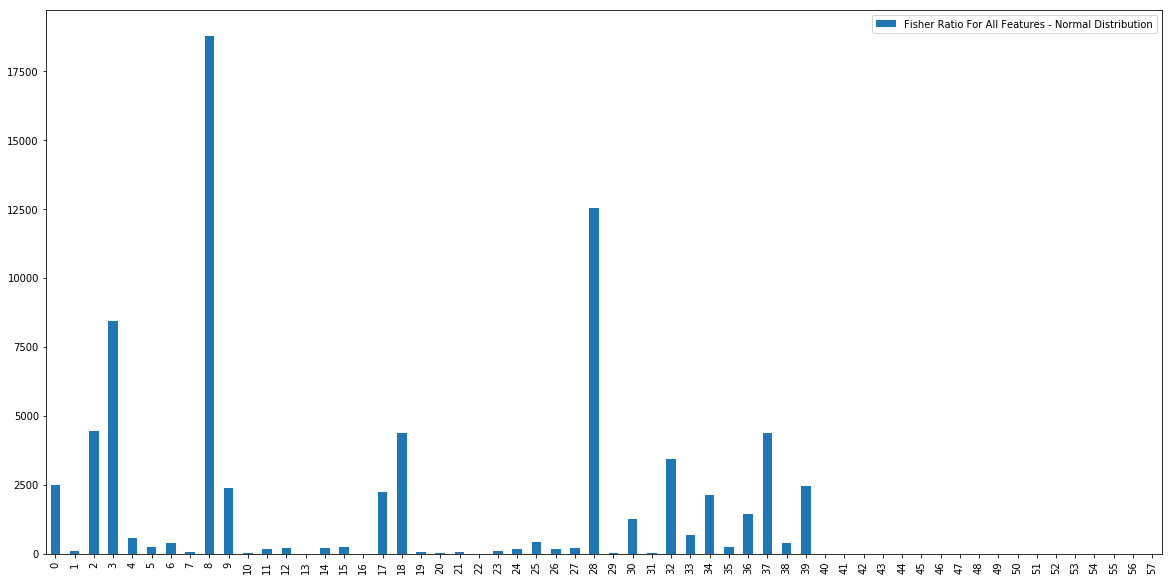

In [59]:
# calculates the fisher score of the features
fisher_scores_normal = fisher_index_calc(training_set_normal.values, label_set)

df = pd.DataFrame({'Fisher Ratio For All Features - Normal Distribution': fisher_scores_normal})
# plot the fisher analysis score
ax = df.plot.bar(figsize=(20,10))
plt.show()

In [60]:
# feature selection based on fisher score
# Fisher Index Ratio Filter - Remove features with low score
# indices of features to remove based on fisher ratios
to_remove = []
for i in range((len(fisher_scores_normal))):
    if fisher_scores_normal[i] < 1000:
        # we mark for removal
        to_remove.append(i)

# remove features with low fisher score
data_feature_fisher_normal = training_set_normal.drop(training_set_normal.columns[to_remove], axis=1, inplace=False)
# ihave about 25 features left.
print ("fisher based features : Normal distributions - ", data_feature_fisher_normal.shape)
data_feature_fisher_normal.columns

fisher based features : Normal distributions -  (38462, 29)


Index([' n_tokens_title', ' n_unique_tokens', ' n_non_stop_unique_tokens',
       ' average_token_length', ' num_keywords', ' kw_max_avg', ' kw_avg_avg',
       ' is_weekend', ' global_subjectivity', ' global_rate_positive_words',
       ' rate_positive_words', ' avg_positive_polarity',
       ' max_positive_polarity', ' avg_negative_polarity',
       ' max_negative_polarity', 'weekdays_Friday', 'weekdays_Monday',
       'weekdays_Saturday', 'weekdays_Sunday', 'weekdays_Thursday',
       'weekdays_Tueday', 'weekdays_Wednesday', 'data_channel_Business',
       'data_channel_Entertainment', 'data_channel_Lifestyle',
       'data_channel_Others', 'data_channel_Social Media', 'data_channel_Tech',
       'data_channel_World'],
      dtype='object')

#### Feature Selection on the whole dataset - Normal Distribution


In [61]:
data_feature2_normal = copy(training_set_normal)

## Visulazing the impact of normal distribution on the data
 In the new transformation, the features observation is more clear than before.


In [62]:
temp_data_normal = pd.concat([training_set_normal, pd.DataFrame(new_shares_log, columns=[' shares'])], axis=1)
label_set6 = data_without_shares.iloc[:, (data_without_shares.shape[1]-1):]
temp_data_normal = pd.concat([temp_data_normal, label_set6], axis=1)


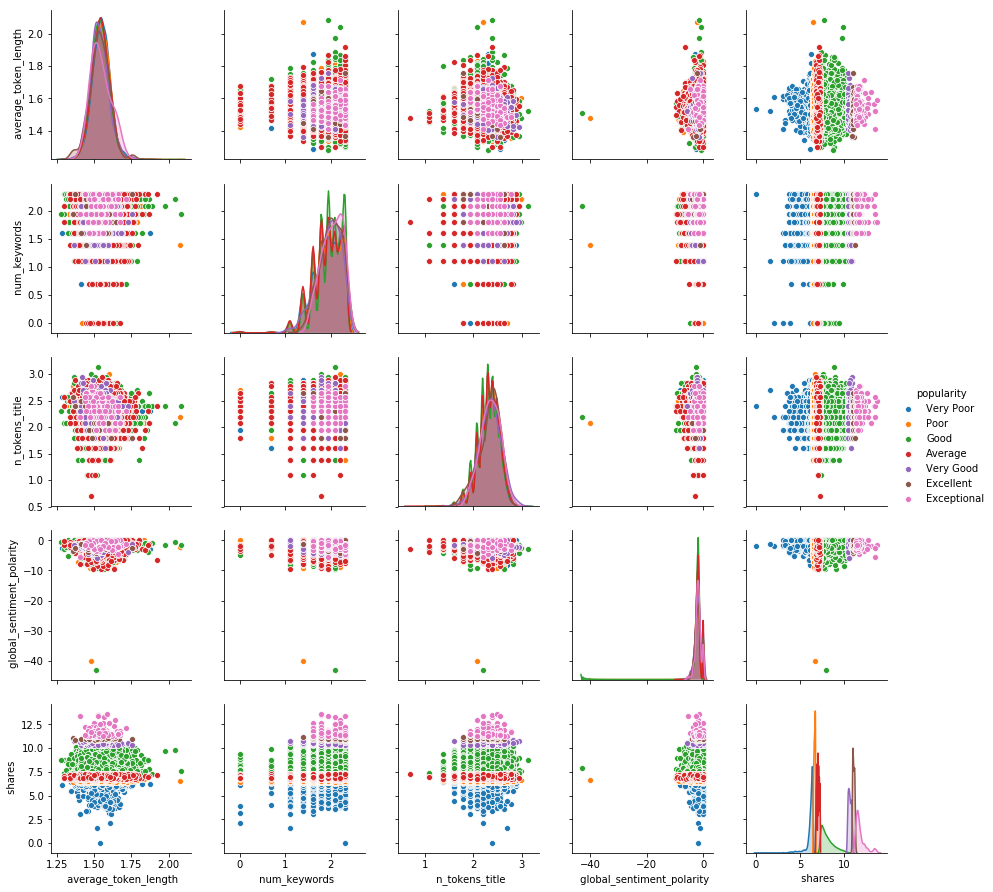

In [63]:
temp_data = temp_data_normal[temp_data_normal[' shares'] <= 100000]
# running a pair plot for the kw__terms
kw_cols = [' average_token_length', ' num_keywords', ' n_tokens_title', ' global_sentiment_polarity', ' shares']
# run a pairplot
sns.pairplot(temp_data_normal, vars=kw_cols, hue='popularity', diag_kind='kde')

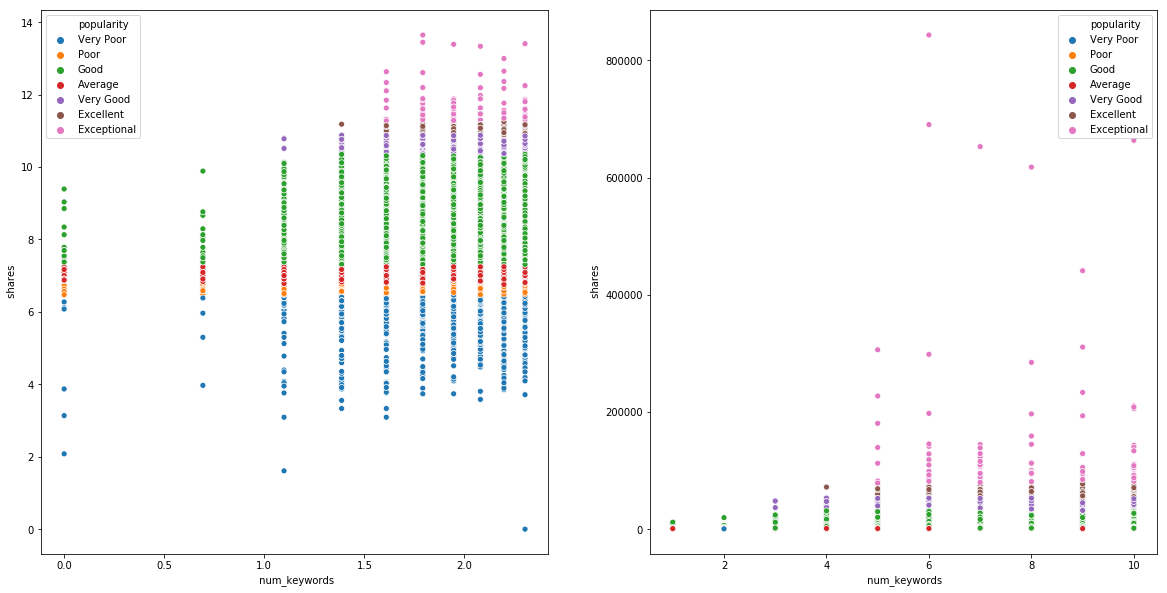

In [64]:
#n_tokens_title
fig, axs = plt.subplots(figsize=(20,10), nrows=1,ncols=2)
sns.scatterplot(x=' num_keywords',y=' shares', hue='popularity', data=temp_data_normal, ax=axs[0])
sns.scatterplot(x=' num_keywords',y=' shares', hue='popularity', data=data, ax=axs[1])

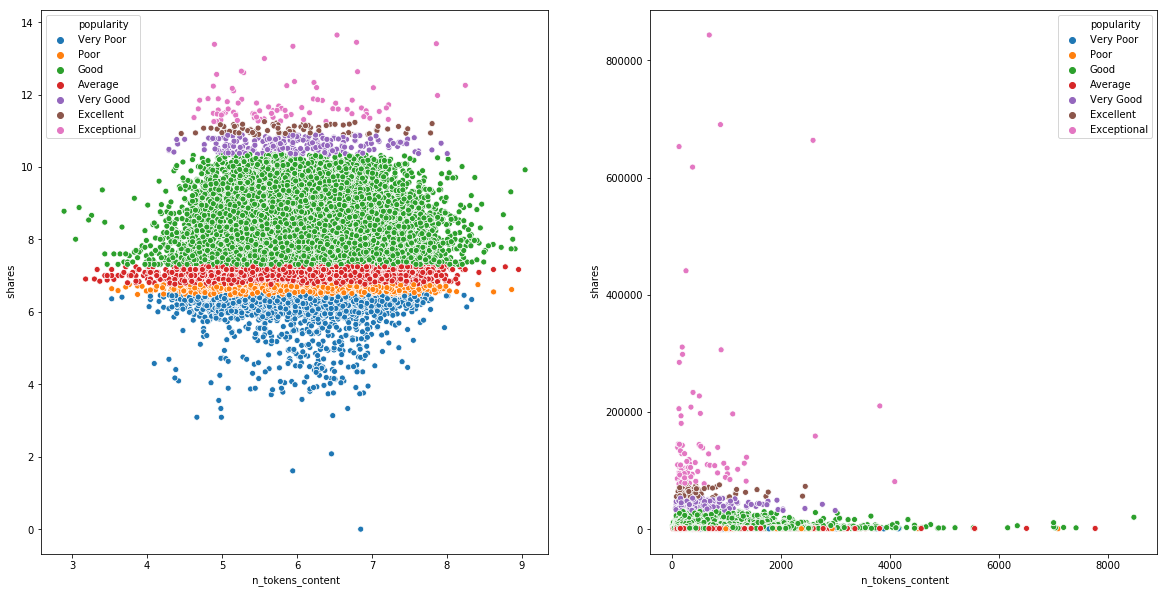

In [65]:
#n_tokens_content
fig, axs = plt.subplots(figsize=(20,10), nrows=1,ncols=2)
sns.scatterplot(x=' n_tokens_content',y=' shares', hue='popularity', data=temp_data_normal, ax=axs[0])
sns.scatterplot(x=' n_tokens_content',y=' shares', hue='popularity', data=data, ax=axs[1])

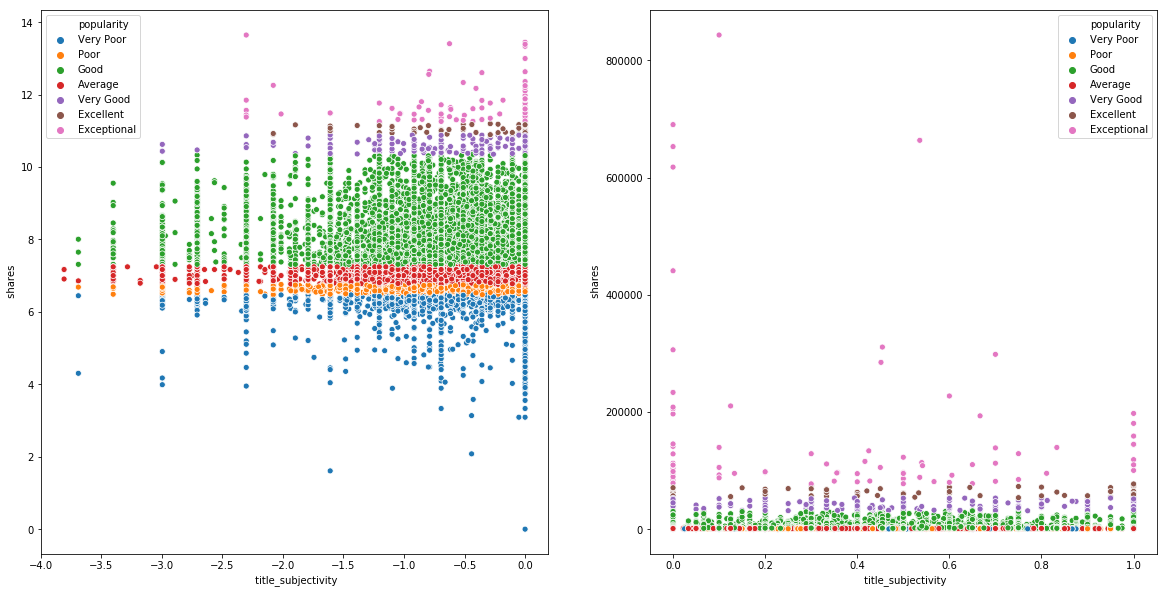

In [66]:
#title_subjectivity
fig, axs = plt.subplots(figsize=(20,10), nrows=1,ncols=2)
sns.scatterplot(x=' title_subjectivity',y=' shares', hue='popularity', data=temp_data_normal, ax=axs[0])
sns.scatterplot(x=' title_subjectivity',y=' shares', hue='popularity', data=data, ax=axs[1])

### Variables of our features selection are listed below:
 - Feature selection based on best hypothesis observed - **data_feature1**
 - Feature Selection on the whole dataset - **data_feature2**
 - Feature selection using fisher discriminal analysis - **data_feature_fisher**
 - Feature selection based on the best hypothesis observed but with a normal distribution (log transformation) - **data_feature1_normal**
 - Feature selection using fisher discriminate analysis on normal distribution dataset - **data_feature_fisher_normal**
 - Feature Selection on the whole dataset - **data_feature2_normal** 

# Model Building and Evaluatio
 - Here, we are going to apply some machine learing models on our dataset for classifying an article popularity

In [67]:
# normalizaling the data with standard scaler
# we will normalized all the features selections

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# scalled all the feature selections
data_feature1_nor = scaler.fit_transform(data_feature1.values)
data_feature2_nor = scaler.fit_transform(data_feature2.values)
data_feature_fisher_nor = scaler.fit_transform(data_feature_fisher.values)
data_feature1_normal_nor = scaler.fit_transform(data_feature1_normal.values)
data_feature_fisher_normal_nor = scaler.fit_transform(data_feature_fisher_normal.values)
data_feature2_normal_nor = scaler.fit_transform(data_feature2_normal.values)

features_selection = [data_feature1_nor, data_feature2_nor, data_feature_fisher_nor, data_feature1_normal_nor, 
                     data_feature_fisher_normal_nor, data_feature2_normal_nor]

features_selection_labels = ['Features on Hypothesis', 'All Features', 'Fisher based Features', 
                             'Features on Hypothesis - Normal Distribution', 'Fisher based Features - Normal Distribution',
                             'All Features - Normal Distribution']


In [68]:
data.head(n=5)

n_tokens_title   n_tokens_content   n_unique_tokens  \
0             12.0              219.0          0.663594   
1              9.0              255.0          0.604743   
2              9.0              211.0          0.575130   
3              9.0              531.0          0.503788   
4             13.0             1072.0          0.415646   

    n_non_stop_unique_tokens   num_hrefs   num_self_hrefs   num_imgs  \
0                   0.815385         4.0              2.0        1.0   
1                   0.791946         3.0              1.0        1.0   
2                   0.663866         3.0              1.0        1.0   
3                   0.665635         9.0              0.0        1.0   
4                   0.540890        19.0             19.0       20.0   

    num_videos   average_token_length   num_keywords  ...  \
0          0.0               4.680365            5.0  ...   
1          0.0               4.913725            4.0  ...   
2          0.0               4.393365            6.0  ...   
3          0.0               4.404896            7.0  ...   
4          0.0               4.682836            7.0  ...   

   max_positive_polarity  avg_negative_polarity   min_negative_polarity  \
0                    0.7              -0.350000                  -0.600   
1                    0.7              -0.118750                  -0.125   
2                    1.0              -0.466667                  -0.800   
3                    0.8              -0.369697                  -0.600   
4                    1.0              -0.220192                  -0.500   

    max_negative_polarity   title_subjectivity   title_sentiment_polarity  \
0               -0.200000             0.500000                  -0.187500   
1               -0.100000             0.000000                   0.000000   
2               -0.133333             0.000000                   0.000000   
3               -0.166667             0.000000                   0.000000   
4               -0.050000             0.454545                   0.136364   

    abs_title_subjectivity   abs_title_sentiment_polarity   shares  popularity  
0                 0.000000                       0.187500      593   Very Poor  
1                 0.500000                       0.000000      711        Poor  
2                 0.500000                       0.000000     1500        Good  
3                 0.500000                       0.000000     1200     Average  
4                 0.045455                       0.136364      505   Very Poor  

[5 rows x 48 columns]

In [69]:
# encoding the label set with a label encoder
from sklearn.preprocessing import LabelEncoder

labelEn = LabelEncoder()
encoded_labels = labelEn.fit_transform(data.loc[:, 'popularity'].values)
class_names = labelEn.classes_
class_names

array(['Average', 'Excellent', 'Exceptional', 'Good', 'Poor', 'Very Good',
       'Very Poor'], dtype=object)

In [70]:
# Splitting the data for Training and Testing
from sklearn.model_selection import train_test_split, GridSearchCV

# train and test for a feature selections
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(data_feature1_nor, encoded_labels, test_size=0.3, shuffle=False)
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(data_feature2_nor, encoded_labels, test_size=0.3, shuffle=False)
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(data_feature_fisher_nor, encoded_labels, test_size=0.3, shuffle=False)
X_train_4, X_test_4, y_train_4, y_test_4 = train_test_split(data_feature1_normal_nor, encoded_labels, test_size=0.3, shuffle=False)
X_train_5, X_test_5, y_train_5, y_test_5 = train_test_split(data_feature_fisher_normal_nor, encoded_labels, test_size=0.3, shuffle=False)
X_train_6, X_test_6, y_train_6, y_test_6 = train_test_split(data_feature2_normal_nor, encoded_labels, test_size=0.3, shuffle=False)

In [71]:
from sklearn.metrics import accuracy_score, make_scorer

In [72]:
features_selection[4].shape

(38462, 29)

In [73]:
encoded_labels.shape

(38462,)

In [74]:
# function for confusion matrix

import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    print(cm)

    fig, ax = plt.subplots(figsize=(10,10))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.32f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout(pad=5, rect= (0, 0, 1, 1))
    return ax

### KNN Classifier

In [75]:
# defining the model
from sklearn.neighbors import KNeighborsClassifier


k_range = np.arange(1,100)
accuracy = []

for n in k_range:    
    neigh = KNeighborsClassifier(n_neighbors=n, n_jobs=-1)

    neigh.fit(X_train_2, y_train_2)  

    # predict the result
    y_pred = neigh.predict(X_test_2)
    #print ("Random Forest Classifer Result")
    #print ("Performance - " + str(100*accuracy_score(y_pred, y_test_2)) + "%")
    accuracy.append(100*accuracy_score(y_pred, y_test_2))



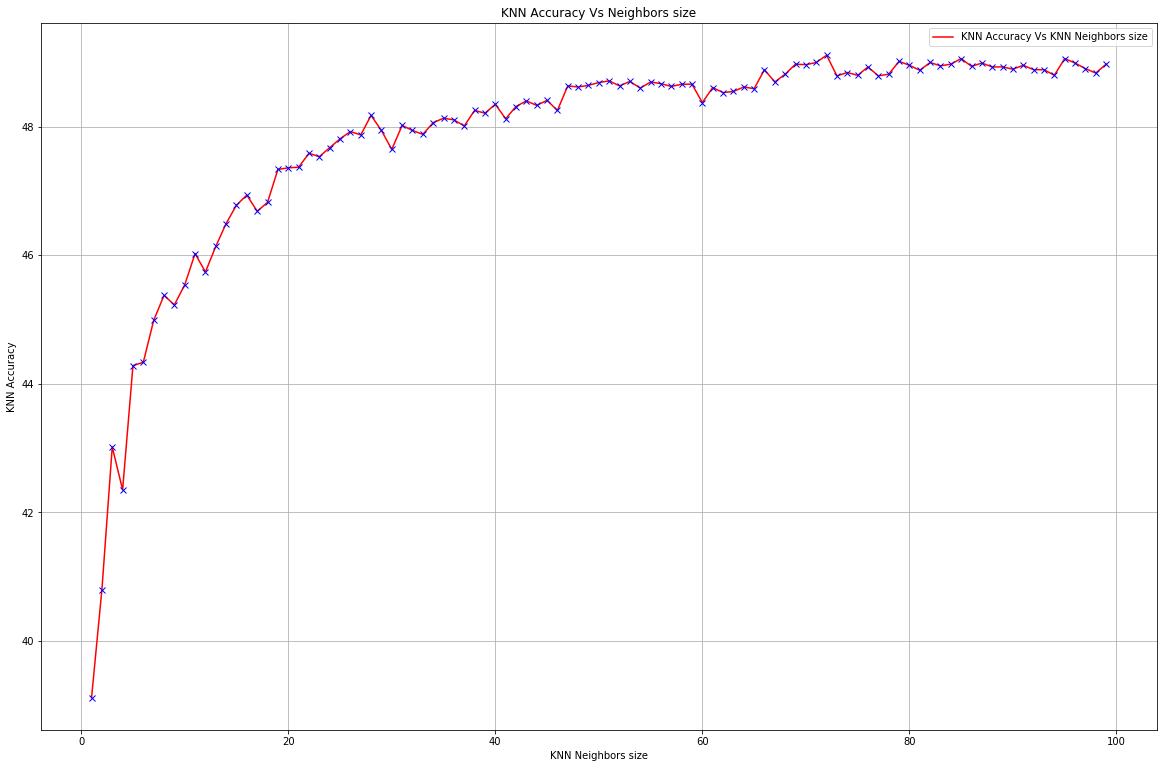

In [76]:
plt.figure(figsize=(20,13))
plt.plot(k_range, accuracy, 'r-', label='KNN Accuracy Vs KNN Neighbors size')
plt.plot(k_range, accuracy, 'bx')
plt.xlabel('KNN Neighbors size')
plt.ylabel('KNN Accuracy')
plt.legend()
plt.grid()
plt.title('KNN Accuracy Vs Neighbors size')
plt.show()

The KNN model that achieved the highest accuracy, at 49.11%, utilized all the features in the dataset and set the number of neighbors to 71. However, it's important to note that this model's accuracy did not significantly surpass that of other models. For instance, models using all features exhibited accuracies that were less than 1% below this peak accuracy.

### Random Forest Classifier


In [77]:
from sklearn.ensemble import RandomForestClassifier

nns = [1, 5, 10, 50, 100, 200, 500, 1000, 2000, 3000]
accuracy = []

for n in nns:    
    clf = RandomForestClassifier(n_estimators=n, n_jobs=5, max_depth=50,
                                 random_state=0)
    clf.fit(X_train_2, y_train_2)  

    # predict the result
    y_pred = clf.predict(X_test_2)
    #print ("Random Forest Classifer Result")
    #print ("Performance - " + str(100*accuracy_score(y_pred, y_test_2)) + "%")
    accuracy.append(100*accuracy_score(y_pred, y_test_2))


In [78]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=1000, n_jobs=-1, max_depth=50,
                             random_state=0)
clf.fit(X_train_2, y_train_2)  

# predict the result
y_pred = clf.predict(X_test_2)
print ("Random Forest Classifer Result")
print ("Performance - " + str(100*accuracy_score(y_pred, y_test_2)) + "%")


Random Forest Classifer Result
Performance - 51.4256001386602%


[[1734    0    0 2256   17    0    0]
 [   1    0    0   17    0    0    0]
 [   1    0    0   13    0    0    0]
 [ 878    0    0 4195    4    0    0]
 [ 880    0    0  675    5    0    0]
 [  10    0    0   67    0    0    0]
 [ 458    0    0  322    6    0    0]]


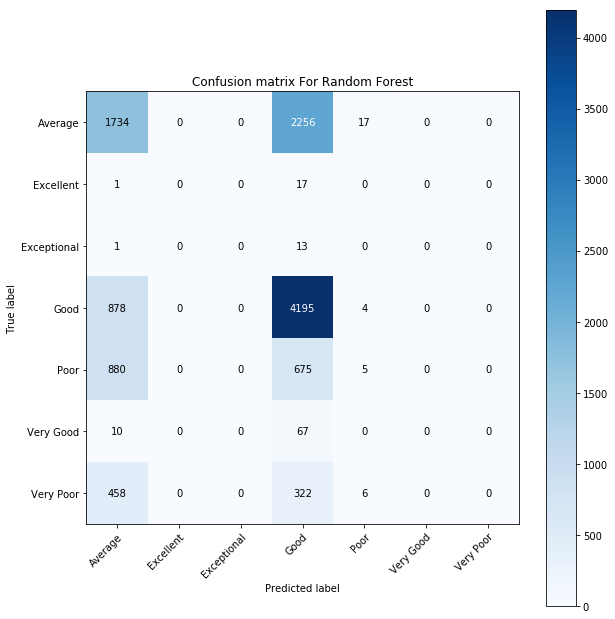

In [79]:
# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test_2, y_pred, classes=class_names,
                      title='Confusion matrix For Random Forest')

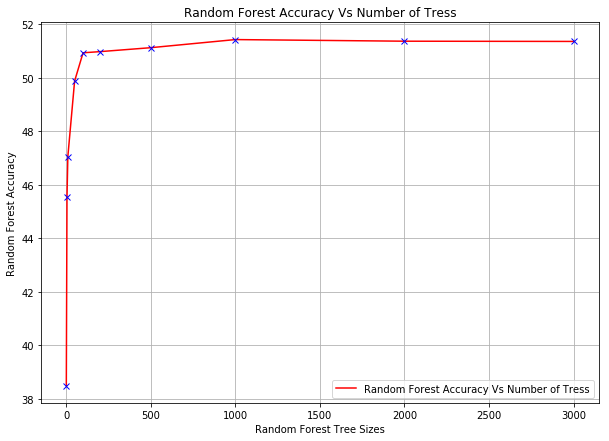

In [80]:
plt.figure(figsize=(10,7))
plt.plot(nns, accuracy, 'r-', label='Random Forest Accuracy Vs Number of Tress')
plt.plot(nns, accuracy, 'bx')
plt.xlabel('Random Forest Tree Sizes')
plt.ylabel('Random Forest Accuracy')
plt.legend()
plt.grid()
plt.title('Random Forest Accuracy Vs Number of Tress')
plt.show()

In [81]:
# iterating through all the possible features

clf = RandomForestClassifier(n_estimators=1000, n_jobs=5, max_depth=50,
                                 random_state=0)

for i in range(len(features_selection)):
    X_train, X_test, y_train, y_test = train_test_split(features_selection[i], encoded_labels, test_size=0.3, shuffle=False)
        
    # commence training - NOTE: It takes hours to be complete
    clf.fit(X_train, y_train)

    # predict the result
    y_pred = clf.predict(X_test)
    
    print("Result for using Feature Selection - ", features_selection_labels[i])
    print ("Random Forest Classifer Result")
    print ("Performance - " + str(100*accuracy_score(y_pred, y_test)) + "%")
   

Result for using Feature Selection -  Features on Hypothesis
Random Forest Classifer Result
Performance - 49.87433919750411%
Result for using Feature Selection -  All Features
Random Forest Classifer Result
Performance - 51.4256001386602%
Result for using Feature Selection -  Fisher based Features
Random Forest Classifer Result
Performance - 48.21041684721379%
Result for using Feature Selection -  Features on Hypothesis - Normal Distribution
Random Forest Classifer Result
Performance - 48.08908917583846%
Result for using Feature Selection -  Fisher based Features - Normal Distribution
Random Forest Classifer Result
Performance - 47.84643383308779%
Result for using Feature Selection -  All Features - Normal Distribution
Random Forest Classifer Result
Performance - 50.550307652309556%


The Random Forest model yielded the most effective results for this classification task, achieving an accuracy of 51.4%. Given the inherent flexibility of Random Forest, which allows for varying the number of decision trees, features, tree depth, splitting criteria, among other parameters, it typically necessitates extensive parameter tuning.

### SVM - Support Vector Machines


In [82]:
from sklearn.svm import SVC

svc_grid = SVC(gamma='auto')

# iterating through all the possible features

for i in range(len(features_selection)):
    X_train, X_test, y_train, y_test = train_test_split(features_selection[i], encoded_labels, test_size=0.3, shuffle=False)
        
    # commence training - NOTE: It takes hours to be complete
    svc_grid.fit(X_train, y_train)

    # predict the result
    y_pred = svc_grid.predict(X_test)
    
    print("Result for using Feature Selection - ", features_selection_labels[i])
    print ("SVC Classifer Result")
    print ("Performance - " + str(100*accuracy_score(y_pred, y_test)) + "%")
   

Result for using Feature Selection -  Features on Hypothesis
SVC Classifer Result
Performance - 49.614351330271255%
Result for using Feature Selection -  All Features
SVC Classifer Result
Performance - 50.57630643903285%
Result for using Feature Selection -  Fisher based Features
SVC Classifer Result
Performance - 48.52240228789323%
Result for using Feature Selection -  Features on Hypothesis - Normal Distribution
SVC Classifer Result
Performance - 45.619204437126264%
Result for using Feature Selection -  Fisher based Features - Normal Distribution
SVC Classifer Result
Performance - 45.1772250628304%
Result for using Feature Selection -  All Features - Normal Distribution
SVC Classifer Result
Performance - 50.19499090042465%


The highest accuracy achieved using the SVM (Support Vector Machine) model was 50.58%. It's been observed that the training time for SVM models tends to increase with the complexity of the model. This complexity rises as the polynomial degree increases, the number of training examples grows, the C value (regularization parameter) escalates, and the number of features in the dataset expands. These factors collectively contribute to the increased complexity of the model in constructing a hyperplane for class separation.

# Conclusion

In this project, we conducted a thorough analysis of an online news dataset and identified several key patterns common to successful articles. Our initial approach involved subjective analysis based on intuition. Recognizing that human intuition can be biased or influenced by past experiences, we supplemented this with quantitative analysis. This included univariate analyses like scatter plots, boxplots, and barplots, comparing each feature against the shares feature to validate our hypotheses.

While our primary objective was to gain insights into the factors that influence article popularity, we also explored predictive modeling. We defined seven popularity classes based on the shares data and developed three machine learning models to predict these classes. Various feature selection techniques were employed to enhance model performance, but they had limited impact on the overall effectiveness of the models.

The most successful model was the Random Forest, achieving a 51.4% accuracy on the test dataset. The moderate accuracy can be attributed to significant variance within the dataset and class imbalance, which skewed the models towards more frequently represented popularity classes.

Based on our comprehensive analysis, we recommend the following strategies to increase article popularity:

- Limit article length to fewer than 1500 words; shorter articles tend to be more popular.
- Optimize article titles to be neither too long nor too short, ideally between 6 to 17 words.
- Include a significant number of images (1 to 40) in articles.
- Incorporate videos but in moderation, as excessive videos can decrease popularity.
- Use easily comprehensible language to enhance readability and popularity.
- Increase the number of keywords in metadata, aiming for more than 5, to boost shareability.
- Reference popular articles to potentially increase the article's own popularity.
- Enrich the article with popular and unique words.
- Avoid using overly long words.
- Publish articles ideally on Mondays and Wednesdays, including some Tuesdays, as weekends are less favorable for publishing.
- Focus on current trends in article topics to attract higher popularity.
- Increase subjectivity in both the title and content.
- Prioritize publishing in "Business" and "Entertainment" channels for better popularity, with "World" and "Tech" channels as secondary options.